In [179]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
import sys
sys.path.append('/usr0/home/naveenr/projects/patient_provider')

In [181]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import argparse
import secrets
import json
import matplotlib as mpl
from copy import deepcopy
import scipy.stats as stats 
import geopandas as gpd
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors

In [182]:
from patient.utils import get_results_matching_parameters,aggregate_data, aggregate_normalize_data
from patient.plotting import *

In [183]:
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('default')

In [184]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [185]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.rcParams['savefig.bbox'] = 'tight'

In [186]:
style_size = 'paper'

In [228]:
methods = ['random','greedy','lp','group_based','gradient_descent_fast']
method_labels = ["Random","Greedy","Pairwise","Group-Based","Gradient Descent"]

# EC Plots

## Synthetic Experiments

### Performance Comparison

In [229]:
x_values = [2,3,4,5]
dataset = 'small'

provider_y_values = [[] for i in range(len(methods))]
provider_y_confidences = [[] for i in range(len(methods))]
baseline_params = {'num_patients': 2, 'fairness_weight': 0}
for i in range(len(x_values)):
    baseline_params['num_providers'] = x_values[i] 

    results = get_results_matching_parameters(dataset,"",baseline_params)
    aggregate_data = aggregate_normalize_data(results,baseline="optimal")
    for method in range(len(method_labels)):
        provider_y_values[method].append(aggregate_data['{}_utilities'.format(methods[method])][0])
        provider_y_confidences[method].append(aggregate_data['{}_utilities'.format(methods[method])][1]/len(results)**.5)

In [230]:
patient_y_values = [[] for i in range(len(methods))]
patient_y_confidences = [[] for i in range(len(methods))]
baseline_params = {'num_providers': 2, 'fairness_weight': 0}
for i in range(len(x_values)):
    baseline_params['num_patients'] = x_values[i] 

    results = get_results_matching_parameters(dataset,"",baseline_params)
    aggregate_data = aggregate_normalize_data(results,baseline="optimal")
    for method in range(len(method_labels)):
        patient_y_values[method].append(aggregate_data['{}_utilities'.format(methods[method])][0])
        patient_y_confidences[method].append(aggregate_data['{}_utilities'.format(methods[method])][1]/len(results)**.5)

In [231]:
np.min(provider_y_values[1:]),np.min(patient_y_values[2])

(0.9655118367351369, 0.7224846069597077)

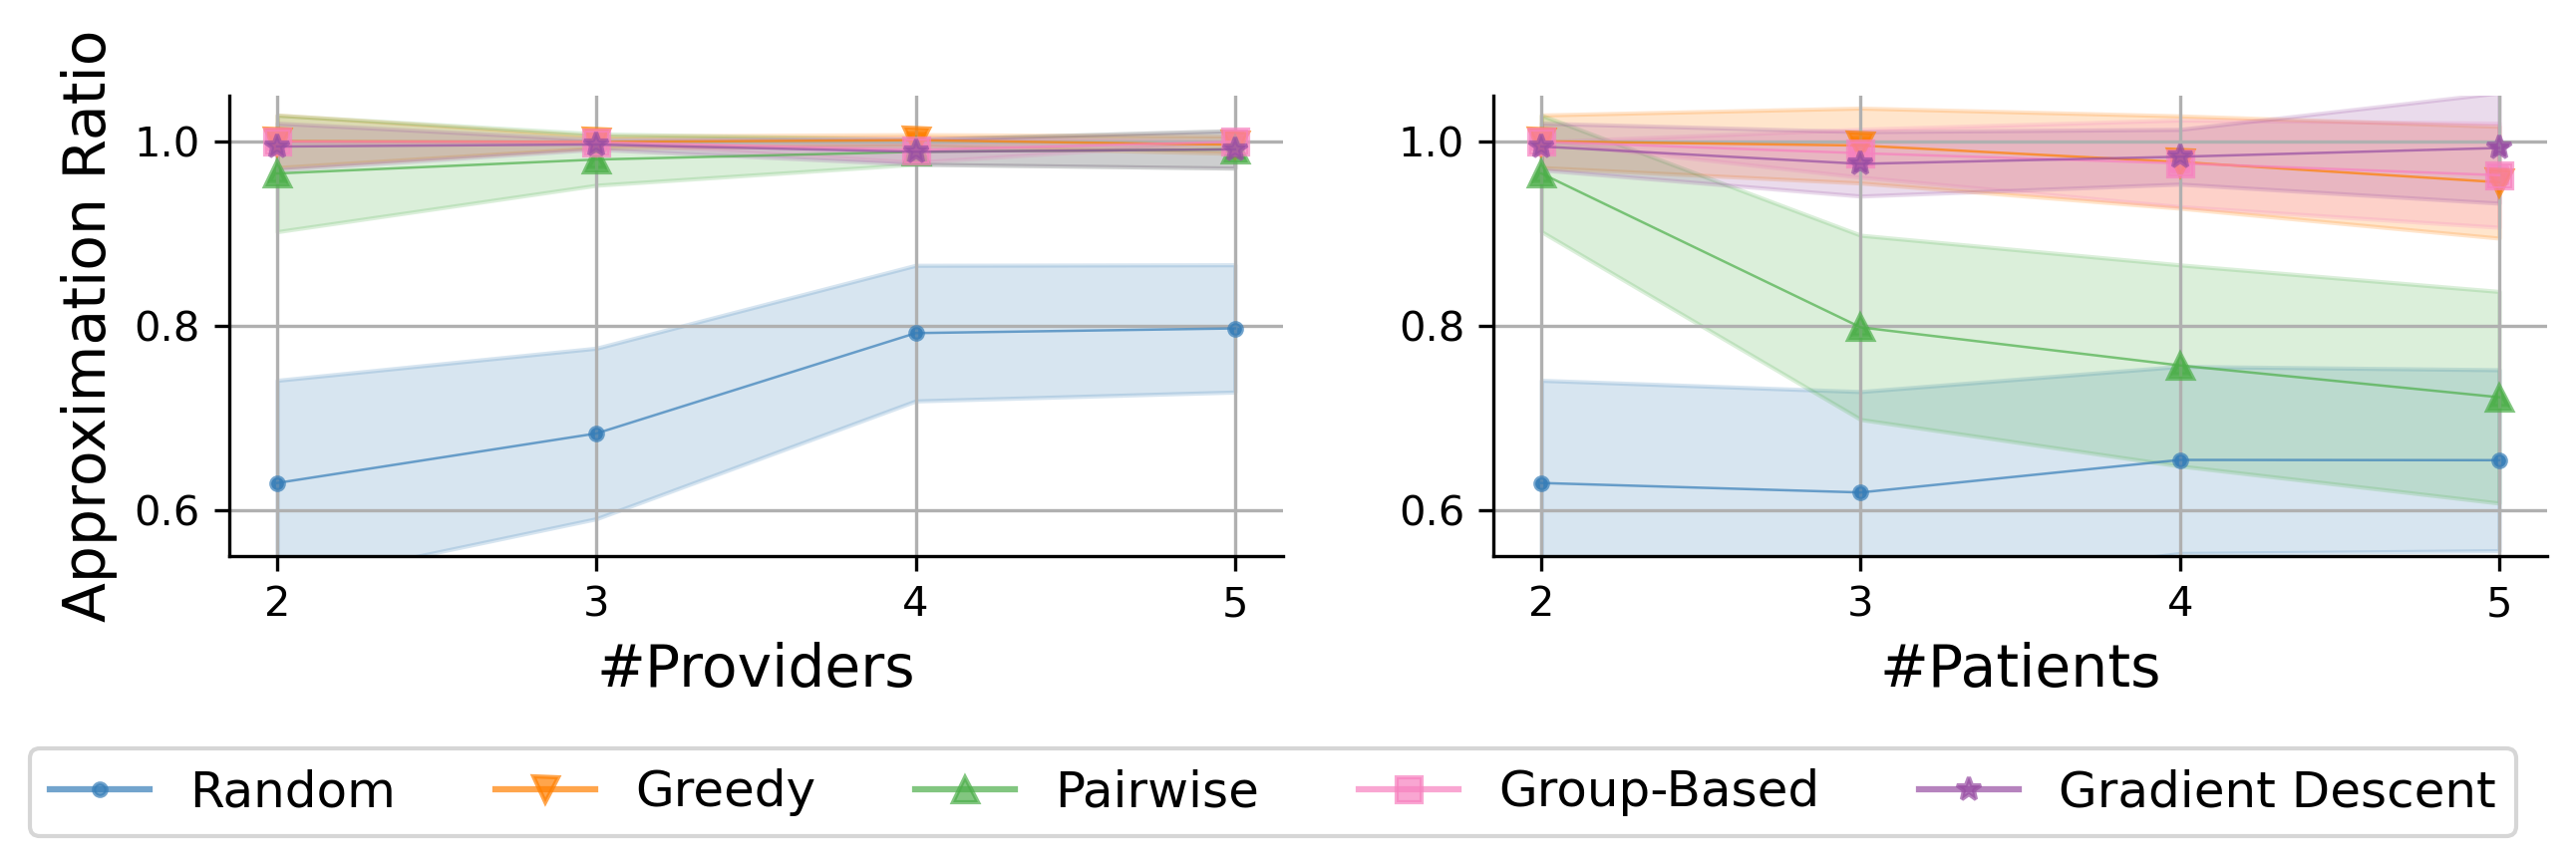

In [233]:
plot_dimensions = (1,2)
x_labels = [["#Providers","#Patients"]]
y_labels = [["Approximation Ratio",""]]
sup_y_label = ""
overall_format = {'figsize':(10,2),
    'style_size': style_size,
    'x_ticks': [[[[2,3,4,5],[2,3,4,5]],[[2,3,4,5],[2,3,4,5]]]],
    'y_ticks': [[[[0.6,0.8,1.0],[0.6,0.8,1.0]],[[0.6,0.8,1.0],[0.6,0.8,1.0]]]],
    'y_lim': [[[0.55,1.05],[0.55,1.05]]],
    'has_grid': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels,y_labels=y_labels,sup_y_label=sup_y_label)

line_format = {'color_palette': 'six_color', 'size': 15}
plot_line(ax[0][0],[x_values for i in range(len(provider_y_values))],provider_y_values,provider_y_confidences,method_labels,line_format)
plot_scatter(ax[0][0],[x_values for i in range(len(provider_y_values))],provider_y_values,[],line_format)

plot_line(ax[0][1],[x_values for i in range(len(patient_y_values))],patient_y_values,patient_y_confidences,method_labels,line_format)
plot_scatter(ax[0][1],[x_values for i in range(len(patient_y_confidences))],patient_y_values,[],line_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'lower left', 'ncol': 5, 'bbox_to_anchor': (0.05,-0.4), 'show_point': True}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("../../results/figures/small_patient_provider.pdf",dpi=300, bbox_inches='tight')

In [234]:
top_choice_probs = [0.1,0.25,0.5,0.75,0.9]
utility_functions = ['uniform','normal']
dataset = "policy_comparison"

x_value_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(2)]
y_value_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(2)]
y_confidence_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(2)]

baseline_params = {'num_patients': 25, 'num_providers': 25, 'max_menu_size': 50, 'fairness_weight': 0}
for i in range(len(y_value_matrix)):
    for j in range(len(y_value_matrix[i])):
        baseline_params['utility_function'] = utility_functions[i]
        baseline_params['top_choice_prob'] = top_choice_probs[j]

        results = get_results_matching_parameters(dataset,"",baseline_params)
        aggregate_data = aggregate_normalize_data(results,baseline="random")
        x_value_matrix[i][j] = [aggregate_data['{}_minimums'.format(method)][0] for method in methods]
        y_value_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][0] for method in methods]
        y_confidence_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][1]/((len(results))**.5) for method in methods]

In [235]:
(y_value_matrix[-1][-1])[1]/(y_value_matrix[-1][-1])[2]

0.9531135597027304

In [236]:
(y_value_matrix[0][-1])[3]/(y_value_matrix[0][-1])[1],(y_value_matrix[-1][-1])[3]/(y_value_matrix[-1][-1])[1]

(1.029286811715851, 1.0524134163833743)

In [237]:
(np.array(y_value_matrix)[:,:,3])/(np.array(y_value_matrix)[:,:,1])

array([[0.99658664, 0.98978   , 0.99378032, 1.00877907, 1.02928681],
       [1.        , 1.        , 0.99858062, 0.9835519 , 1.05241342]])

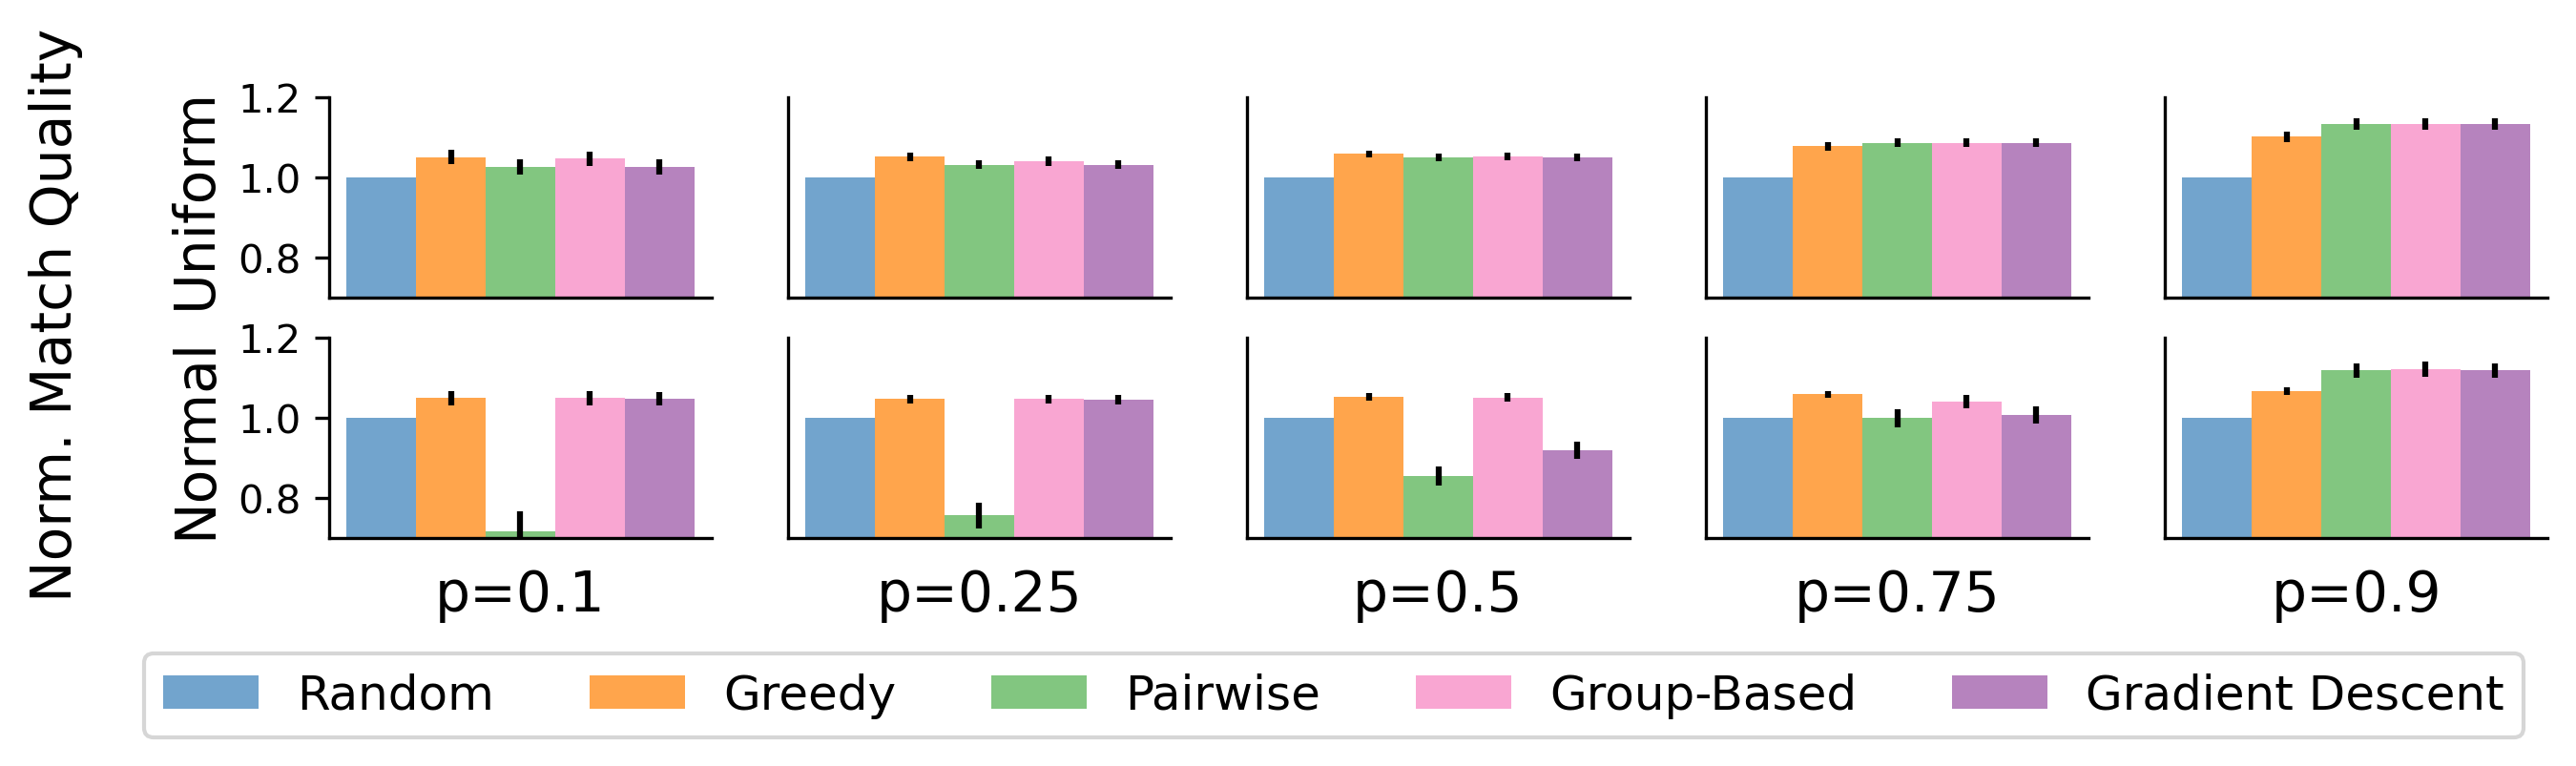

In [249]:
plot_dimensions = (2,5)
x_labels = [["","","","",""],["p=0.1","p=0.25","p=0.5","p=0.75","p=0.9"]]
y_labels = [["Uniform","","","",""],["Normal","","","",""]]
sup_y_label = "Norm. Match Quality"

overall_format = {'figsize':(10, 2),
    'style_size': style_size,
    'x_ticks': [[[[],[]] for i in range(5)] for i in range(2)],
    'y_lim': [[[0.7,1.2] for i in range(5)] for j in range(2)], 
    'y_ticks': [[[[],[]] if i != 0 else [[0.8,1,1.2],[0.8,1.0,1.2]] for i in range(5)] for i in range(2)],
}
fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,x_labels=x_labels,sup_y_label=sup_y_label)

bar_format = {'style_size': style_size,
    'color_palette': 'six_color'}

for i in range(2):
    for j in range(5):
        x_groups = [0,1,2,3,4]
        y_values = y_value_matrix[i][j]
        y_errors = y_confidence_matrix[i][j]
        labels = method_labels
        plot_bar(ax[i][j],x_groups,y_values,y_errors,labels,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper right', 'ncol': 5, 'bbox_to_anchor': (0.9,-0.05)}
create_legend(fig,ax,plot_dimensions,legend_format)
fig.savefig("../../results/figures/policy_comparison.pdf",dpi=300, bbox_inches='tight')

In [239]:
top_choice_probs = [0.1,0.3,0.5,0.7,0.9]
num_patients = [10,20,30,40,50,60]
utility_function = 'uniform'
dataset = "providers_patients"

y_value_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(6)]
y_confidence_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(6)]

baseline_params = {'num_patients': 10, 'num_providers': 10, 'max_menu_size': 50, 'utility_function': utility_function, 'fairness_weight': 0}
for i in range(len(y_value_matrix)):
    for j in range(len(y_value_matrix[i])):
        baseline_params['num_patients'] = num_patients[i]
        baseline_params['top_choice_prob'] = top_choice_probs[j]

        results = get_results_matching_parameters(dataset,"",baseline_params)
        aggregate_data = aggregate_normalize_data(results,baseline="random")
        y_value_matrix[i][j] = np.argmax([aggregate_data['{}_utilities'.format(method)][0] for method in methods])

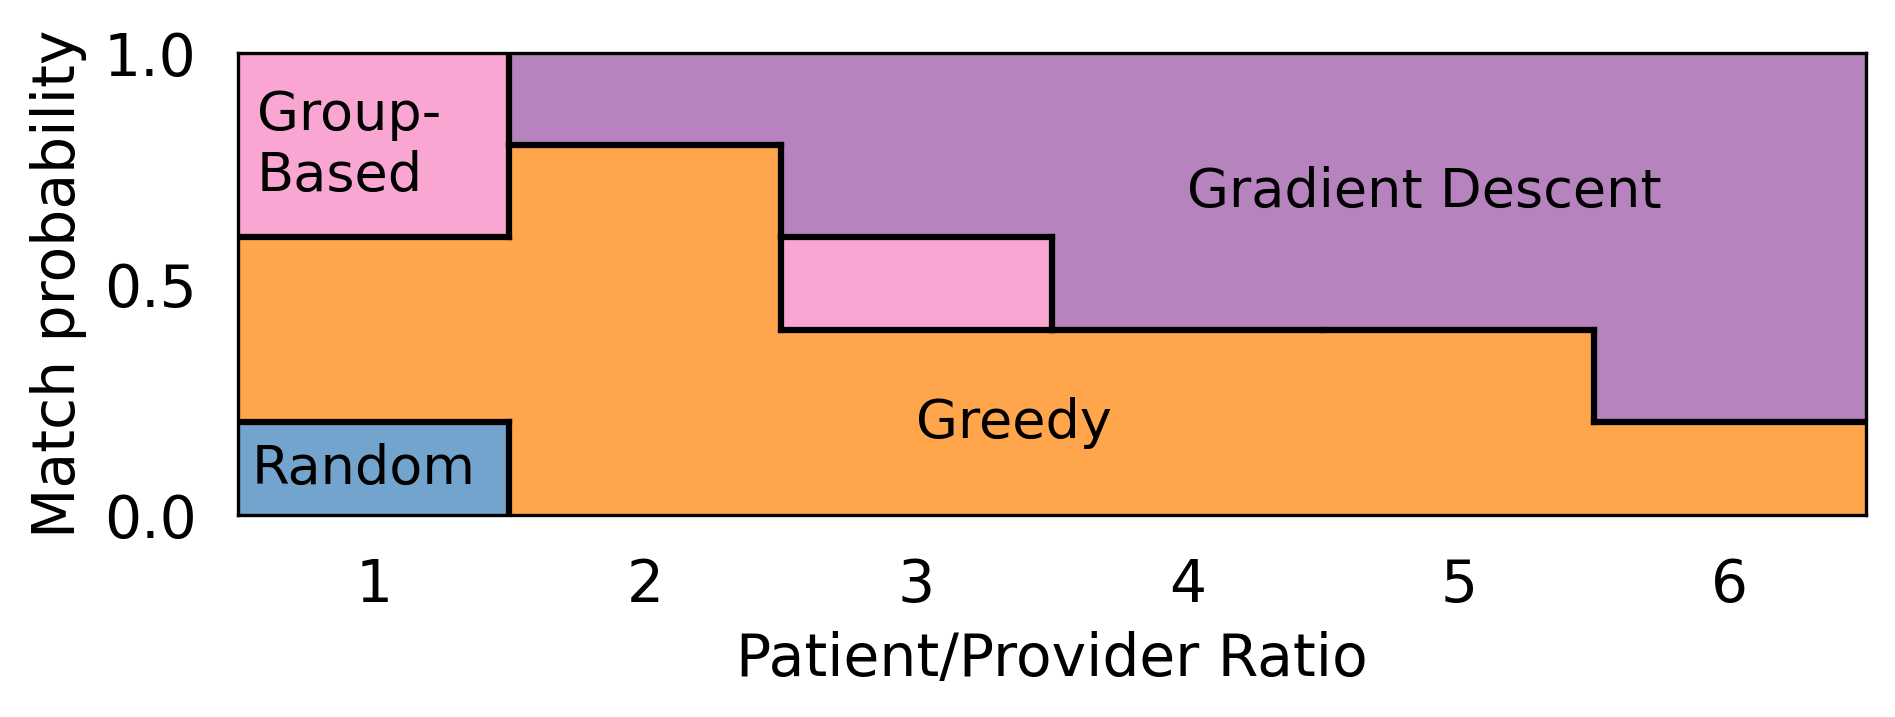

In [241]:
plt.figure(figsize=(7,2))
reference_patients = num_patients[0]
gaps = 1/2
for i in range(len(top_choice_probs)):
    for j in range(len(num_patients)):
        scaled_patients = num_patients[j]/reference_patients
        x = [scaled_patients-gaps,scaled_patients-gaps,scaled_patients+gaps,scaled_patients+gaps,scaled_patients-gaps]
        y = [top_choice_probs[i]-0.1,top_choice_probs[i]+0.1,top_choice_probs[i]+0.1,top_choice_probs[i]-0.1,top_choice_probs[i]-0.1]
        plt.fill(x, y, color=color_schemes['six_color'][y_value_matrix[j][i]],lw=0)

        if i<len(top_choice_probs)-1 and y_value_matrix[j][i]!=y_value_matrix[j][i+1]:
            plt.plot([scaled_patients-gaps,scaled_patients+gaps],[top_choice_probs[i]+0.1,top_choice_probs[i]+0.1],color='black')
        if j<len(num_patients)-1 and y_value_matrix[j][i]!=y_value_matrix[j+1][i]:
            plt.plot([scaled_patients+gaps,scaled_patients+gaps],[top_choice_probs[i]-0.1,top_choice_probs[i]+0.1],color='black')
    plt.ylim([0,1])
    plt.xlim([0.5,6.5])
plt.tick_params(axis='both',which='both',length=0,pad=10)
ax = plt.gca()  # Get the current Axes object
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)

plt.xlabel("Patient/Provider Ratio",fontsize=14)
plt.ylabel("Match probability",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(0.57,0.8,"Group-\nBased",verticalalignment='center',fontsize=13)
plt.text(3,0.2,"Greedy",verticalalignment='center',fontsize=13)
plt.text(4,0.7,"Gradient Descent",verticalalignment='center',fontsize=13)
plt.text(0.55,0.1,"Random",verticalalignment='center',fontsize=13)
plt.savefig("../../results/figures/phase_diagram.pdf",dpi=300, bbox_inches='tight')

### Fairness Plots

In [242]:
top_choice_probs = [0.1,0.25,0.5,0.75,0.9]
utility_functions = ['uniform','normal']
dataset = "policy_comparison"

x_value_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(2)]
y_value_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(2)]
y_confidence_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(2)]

baseline_params = {'num_patients': 25, 'num_providers': 25, 'max_menu_size': 50, 'fairness_weight': 0}
for i in range(len(y_value_matrix)):
    for j in range(len(y_value_matrix[i])):
        baseline_params['utility_function'] = utility_functions[i]
        baseline_params['top_choice_prob'] = top_choice_probs[j]

        results = get_results_matching_parameters(dataset,"",baseline_params)
        aggregate_data = aggregate_normalize_data(results,baseline="random")

        x_value_matrix[i][j] = [aggregate_data['{}_minimums'.format(method)][0] for method in methods]
        y_value_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][0] for method in methods]
        y_confidence_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][1]/((len(results))**.5) for method in methods]

In [243]:
np.array(x_value_matrix)[:,:,3]/(np.max(np.array(x_value_matrix),axis=2))

array([[0.99470335, 0.97994719, 0.99800596, 0.99714321, 1.        ],
       [1.        , 1.        , 0.96509208, 0.77953197, 0.911047  ]])

In [244]:
np.array(y_value_matrix)[:,:,3]/(np.max(np.array(y_value_matrix),axis=2))

array([[0.99658664, 0.98978   , 0.99378032, 1.        , 1.        ],
       [1.        , 1.        , 0.99858062, 0.9835519 , 1.        ]])

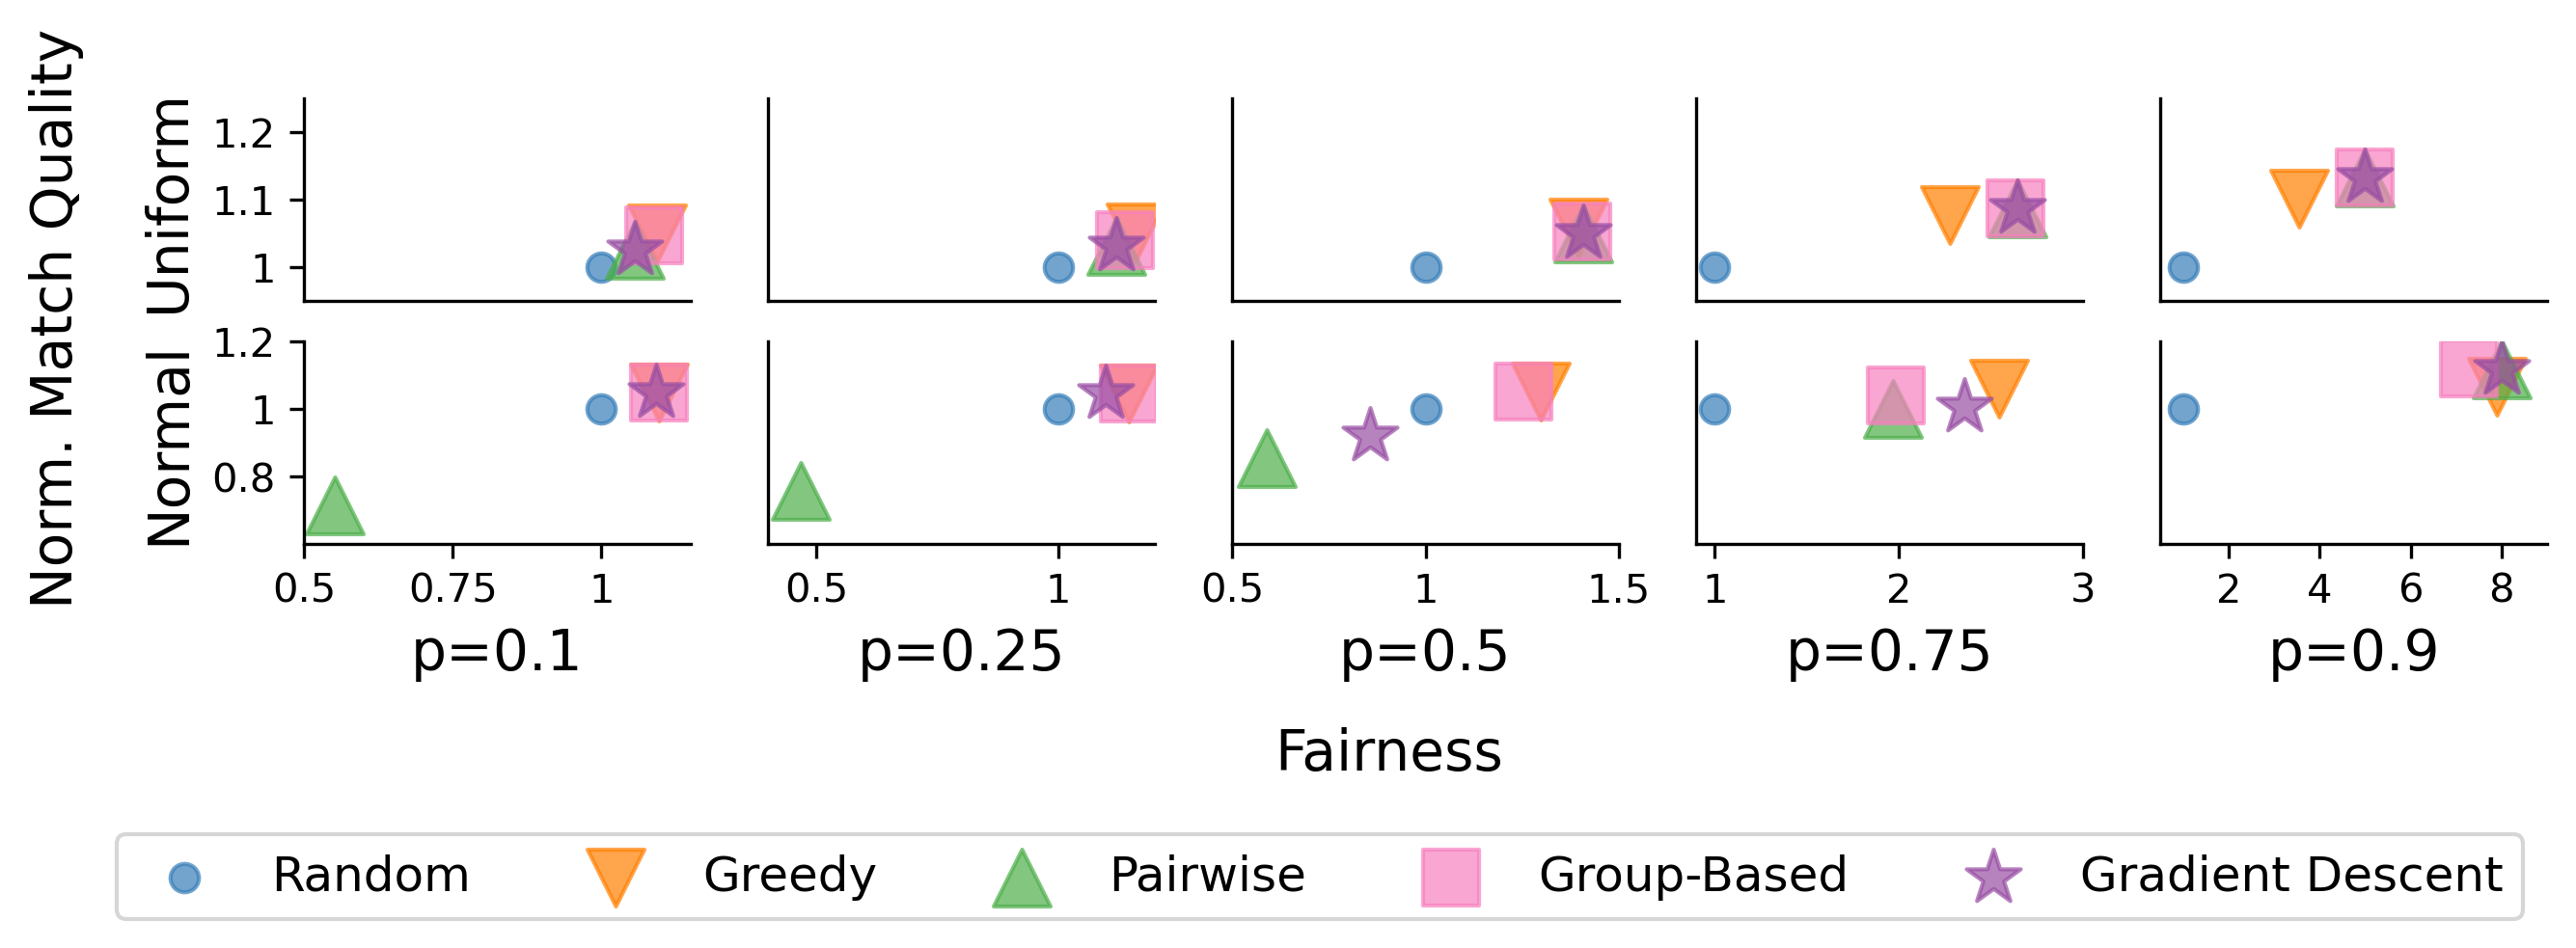

In [245]:
plot_dimensions = (2,5)
x_labels = [["","","","",""],["p=0.1","p=0.25","p=0.5","p=0.75","p=0.9"]]
y_labels = [["Uniform","","","",""],["Normal","","","",""]]
sup_y_label = "Norm. Match Quality"
sup_x_label = "Fairness" 

figsize = (10,4.75)

x_shift = [[0.01,0.02,0.03,0.08,0.2],[0.05,0.06,0.08,0.13,0.35]]
x_shift_right = [[0.01,0.02,0.03,0.1,0.4],[0.05,0.06,0.08,0.13,0.6]]
y_shift = [[0.01,0.01,0.01,0.01,0.02],[0.2,0.2,0.2,0.1,0.1]]
y_shift_right = [[0.01,0.01,0.01,0.02,0.05],[0.2,0.2,0.2,0.1,0.1]]

y_lim = [[0.95,1.25],[0.6,1.2]]
x_lim = [[0.5,1.15],[0.4,1.2],[0.5,1.5],[0.9,3],[0.5,9]]
y_ticks = [[[[],[]] for j in range(5)] for i in range(2)]
y_ticks[0][0] = [[1,1.1,1.2],[1,1.1,1.2]]
y_ticks[1][0] = [[0.8,1,1.2],[0.8,1,1.2]]
x_ticks = [[[[],[]] for j in range(5)] for i in range(2)]
x_ticks[1][0] = [[0.5,0.75,1],[0.5,0.75,1]]
x_ticks[1][1] = [[0.5,1],[0.5,1]]
x_ticks[1][2] = [[0.5,1,1.5],[0.5,1,1.5]]
x_ticks[1][3] = [[1,2,3],[1,2,3]]
x_ticks[1][4] = [[2,4,6,8],[2,4,6,8]]

overall_format = {'figsize':(10, 2),
    'style_size': style_size,
    'x_ticks': x_ticks,
    'y_ticks': y_ticks,
    'x_lim': [[x_lim[i] for i in range(5)] for j in range(2)],
    'y_lim': [[y_lim[j] for i in range(5)] for j in range(2)],
}
fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,x_labels=x_labels,sup_y_label=sup_y_label,sup_x_label=sup_x_label,sup_x_label_loc=-0.3,sup_y_label_loc=0.03)

scatter_format = {'color_palette': 'six_color', 'size': 200}

for i in range(2):
    for j in range(5):
        x_values = [[k] for k in x_value_matrix[i][j]]
        y_values = y_value_matrix[i][j]
        y_values = [[k] for k in y_values]
        labels = method_labels
        plot_scatter(ax[i][j],x_values,y_values,labels,scatter_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper right', 'ncol': 5, 'bbox_to_anchor': (0.9,-0.35)}
create_legend(fig,ax,plot_dimensions,legend_format)
fig.savefig("../../results/figures/fairness_comparison.pdf",dpi=300, bbox_inches='tight')

In [246]:
menu_y_values = [[] for i in range(len(methods))]
menu_confidences = [[] for i in range(len(methods))]
top_choice_probs = [0.1,0.25,0.5,0.75,0.9]
baseline_params = {'utility_function': 'uniform', 'num_patients': 25, 'top_choice_prob': 0.1}
dataset = "policy_comparison"
fairness_values = [0.1,0.25,0.5,0.75,0.9]
all_x_values = []
all_y_values = []
all_lp_x_values = []
all_lp_y_values = []

for top_choice_prob in top_choice_probs:
    x_values = []
    y_values = []
    lp_x_values = []
    lp_y_values = []
    for i in range(len(fairness_values)):
        baseline_params['fairness_weight'] = fairness_values[i]
        baseline_params['top_choice_prob'] = top_choice_prob

        results = get_results_matching_parameters(dataset,"",baseline_params)
        aggregate_data = aggregate_normalize_data(results,baseline="random")
        y_values.append(aggregate_data['{}_utilities'.format('lp_fairness')][0])
        x_values.append(aggregate_data['{}_minimums'.format('lp_fairness')][0])

        lp_y_values.append(aggregate_data['{}_utilities'.format('lp')][0])
        lp_x_values.append(aggregate_data['{}_minimums'.format('lp')][0])
        
    all_x_values.append(x_values)
    all_y_values.append(y_values)

    all_lp_x_values.append(lp_x_values)
    all_lp_y_values.append(lp_y_values)

In [247]:
all_x_values[-1][1]/all_lp_x_values[-1][0], all_y_values[-1][1]/all_lp_y_values[-1][0]

(1.0114950700667835, 0.9998548832375383)

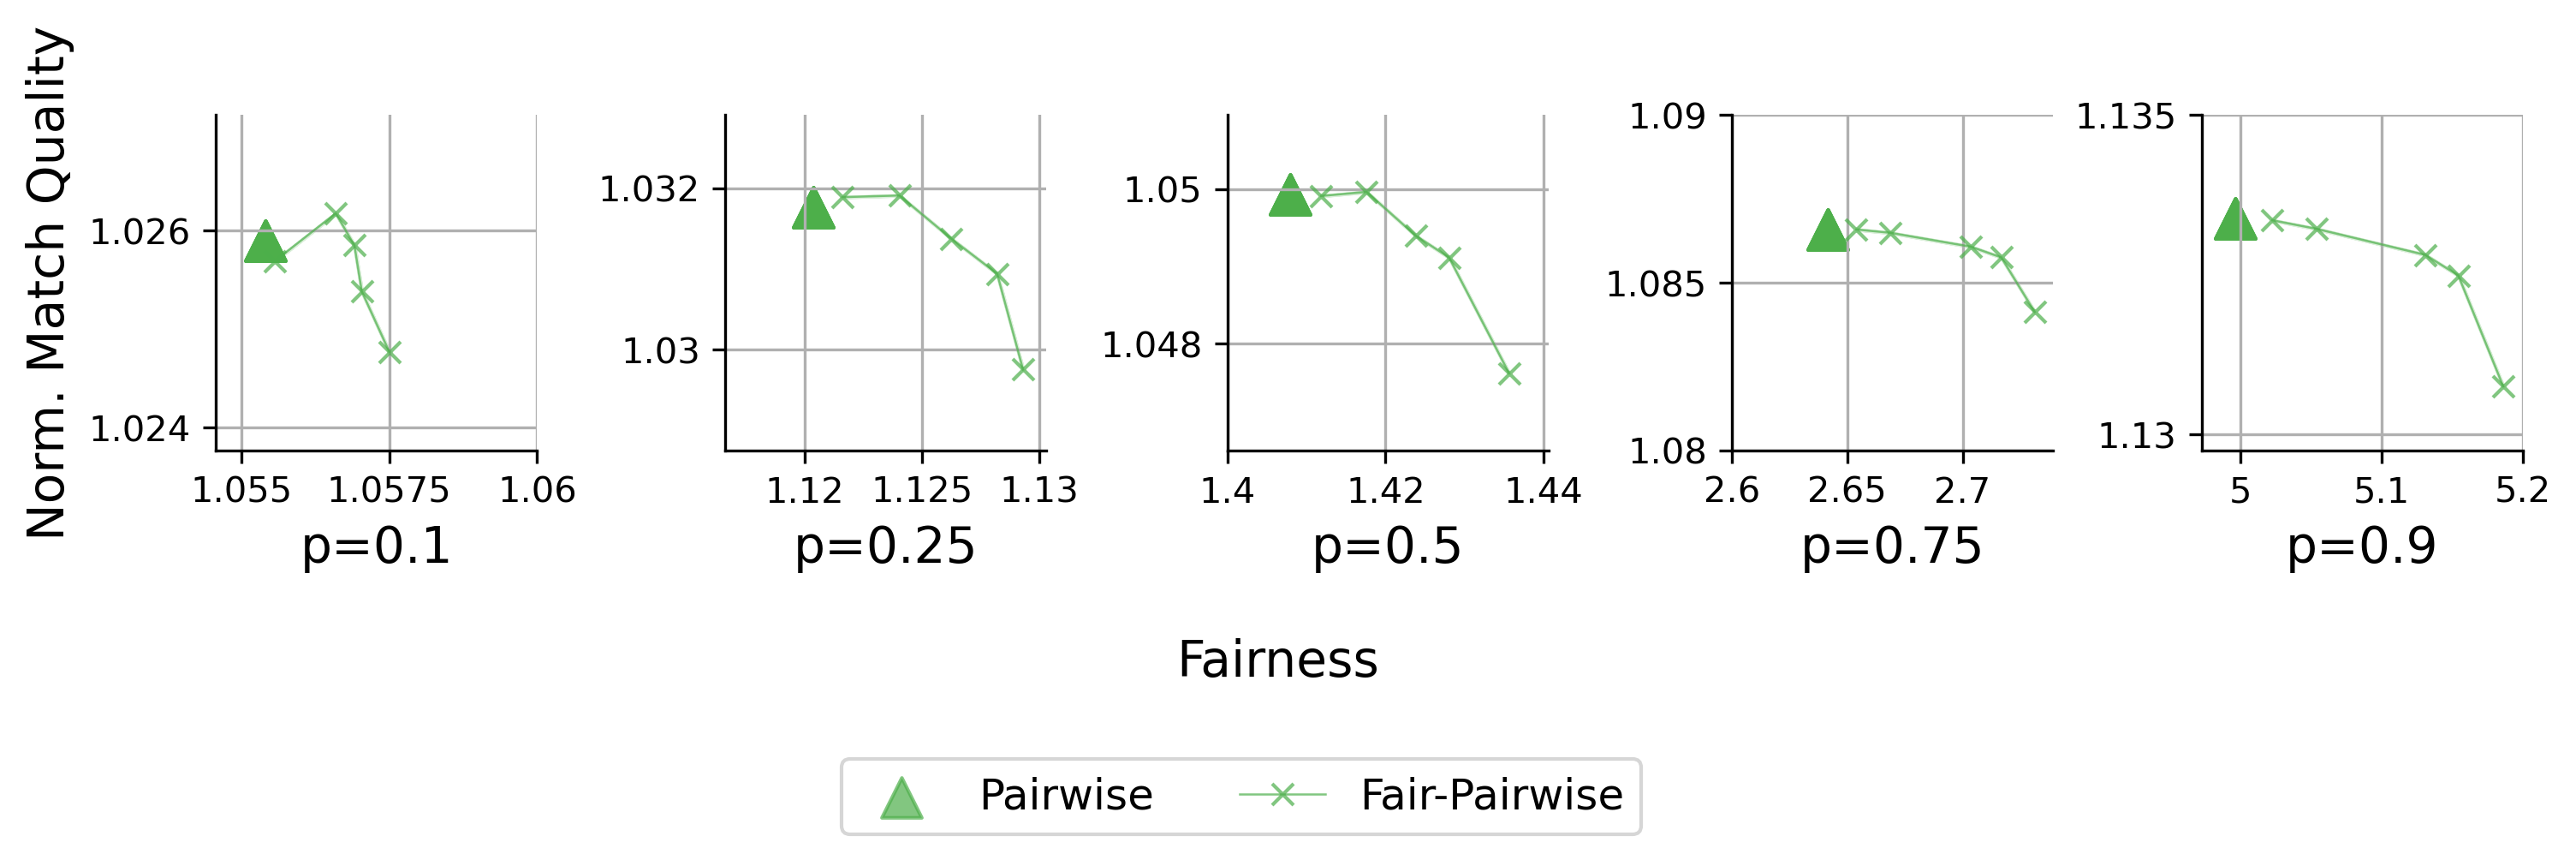

In [253]:
plot_dimensions = (1,5)
x_labels = [["p={}".format(top_choice_probs[i]) for i in range(5)]]
y_labels = [["Norm. Match Quality","","","",""]]
sup_x_label = 'Fairness'
sup_x_label_loc=-0.2
x_shift = [0.001,0.005,0.008,0.02,0.05]
x_shift_right = [0.001,0.001,0.005,0.008,0.01]

x_ticks = [[[[1.055,1.0575,1.06], [1.055,1.0575,1.06]], [[1.12,1.125,1.13], [1.12,1.125,1.13]], [[1.4,1.42,1.44], [1.4,1.42,1.44]], [[2.6,2.65,2.7], [2.6,2.65,2.7]], [[5,5.1,5.2], [5,5.1,5.2]]]]
y_ticks = [[[[1.024,1.026], [1.024,1.026]], [[1.03,1.032], [1.03,1.032]], [[1.048,1.05], [1.048,1.05]], [[1.08,1.085,1.09], [1.08,1.085,1.09]], [[1.13,1.135], [1.13,1.135]]]]

overall_format = {'figsize':(10,2),
    'style_size': style_size,
    'x_ticks': x_ticks,
    'y_ticks': y_ticks,
    'x_lim': [[[min(all_x_values[i])-x_shift[i],max(all_x_values[i])+x_shift_right[i]] for i in range(5)] for j in range(1)],
    'y_lim': [[[min(all_y_values[i])-0.001,max(all_y_values[i])+0.001] for i in range(5)] for j in range(1)],
    'has_grid': True, 
    'constrained_layout': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels,y_labels=y_labels,sup_x_label=sup_x_label,sup_x_label_loc=sup_x_label_loc)

for i in range(5):
    line_format = {'color_palette': 'six_color', 'size': 125}
    plot_scatter(ax[0][i],[[],[],all_lp_x_values[i]],[[],[],all_lp_y_values[i]],[None,None,"Pairwise"],line_format)
    line_format['color_palette'] = "#4CAF4AB3"
    plot_line(ax[0][i],[[],[],[],[],[],all_x_values[i]],[[],[],[],[],[],all_y_values[i]],[0 for _ in range(6)],["","","","","","Fair-Pairwise"],line_format)
legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper right', 'ncol': 5, 'bbox_to_anchor': (0.65,-0.3)}
create_legend(fig,ax,plot_dimensions,legend_format)


fig.savefig("../../results/figures/fairness_pareto.pdf",dpi=300, bbox_inches='tight')

### Number of Providers

In [254]:
ratio_y_values = [[] for i in range(len(methods))]
ratio_confidences = [[] for i in range(len(methods))]
baseline_params = {'num_providers': 25,'max_menu_size': 500}
dataset = "providers_patients"
x_values = [2,4,6,8]
for i in range(len(x_values)):
    baseline_params['num_patients'] = x_values[i]*25

    results = get_results_matching_parameters(dataset,"",baseline_params)
    print(len(results))
    aggregate_data = aggregate_normalize_data(results,baseline="random")
    for method in range(len(labels)):
        ratio_y_values[method].append(aggregate_data['{}_utilities'.format(methods[method])][0])
        ratio_confidences[method].append(aggregate_data['{}_utilities'.format(methods[method])][1]/len(results)**.5)

15
15
15
15


In [255]:
np.array(ratio_y_values[-1])/np.array(ratio_y_values[1])

array([0.82934452, 1.00481258, 1.06520179, 1.07991608])

In [256]:
np.max(np.array(ratio_y_values),axis=1)/np.min(np.array(ratio_y_values),axis=1)

array([1.        , 1.01693183, 1.04354529, 1.0157473 , 1.28458467])

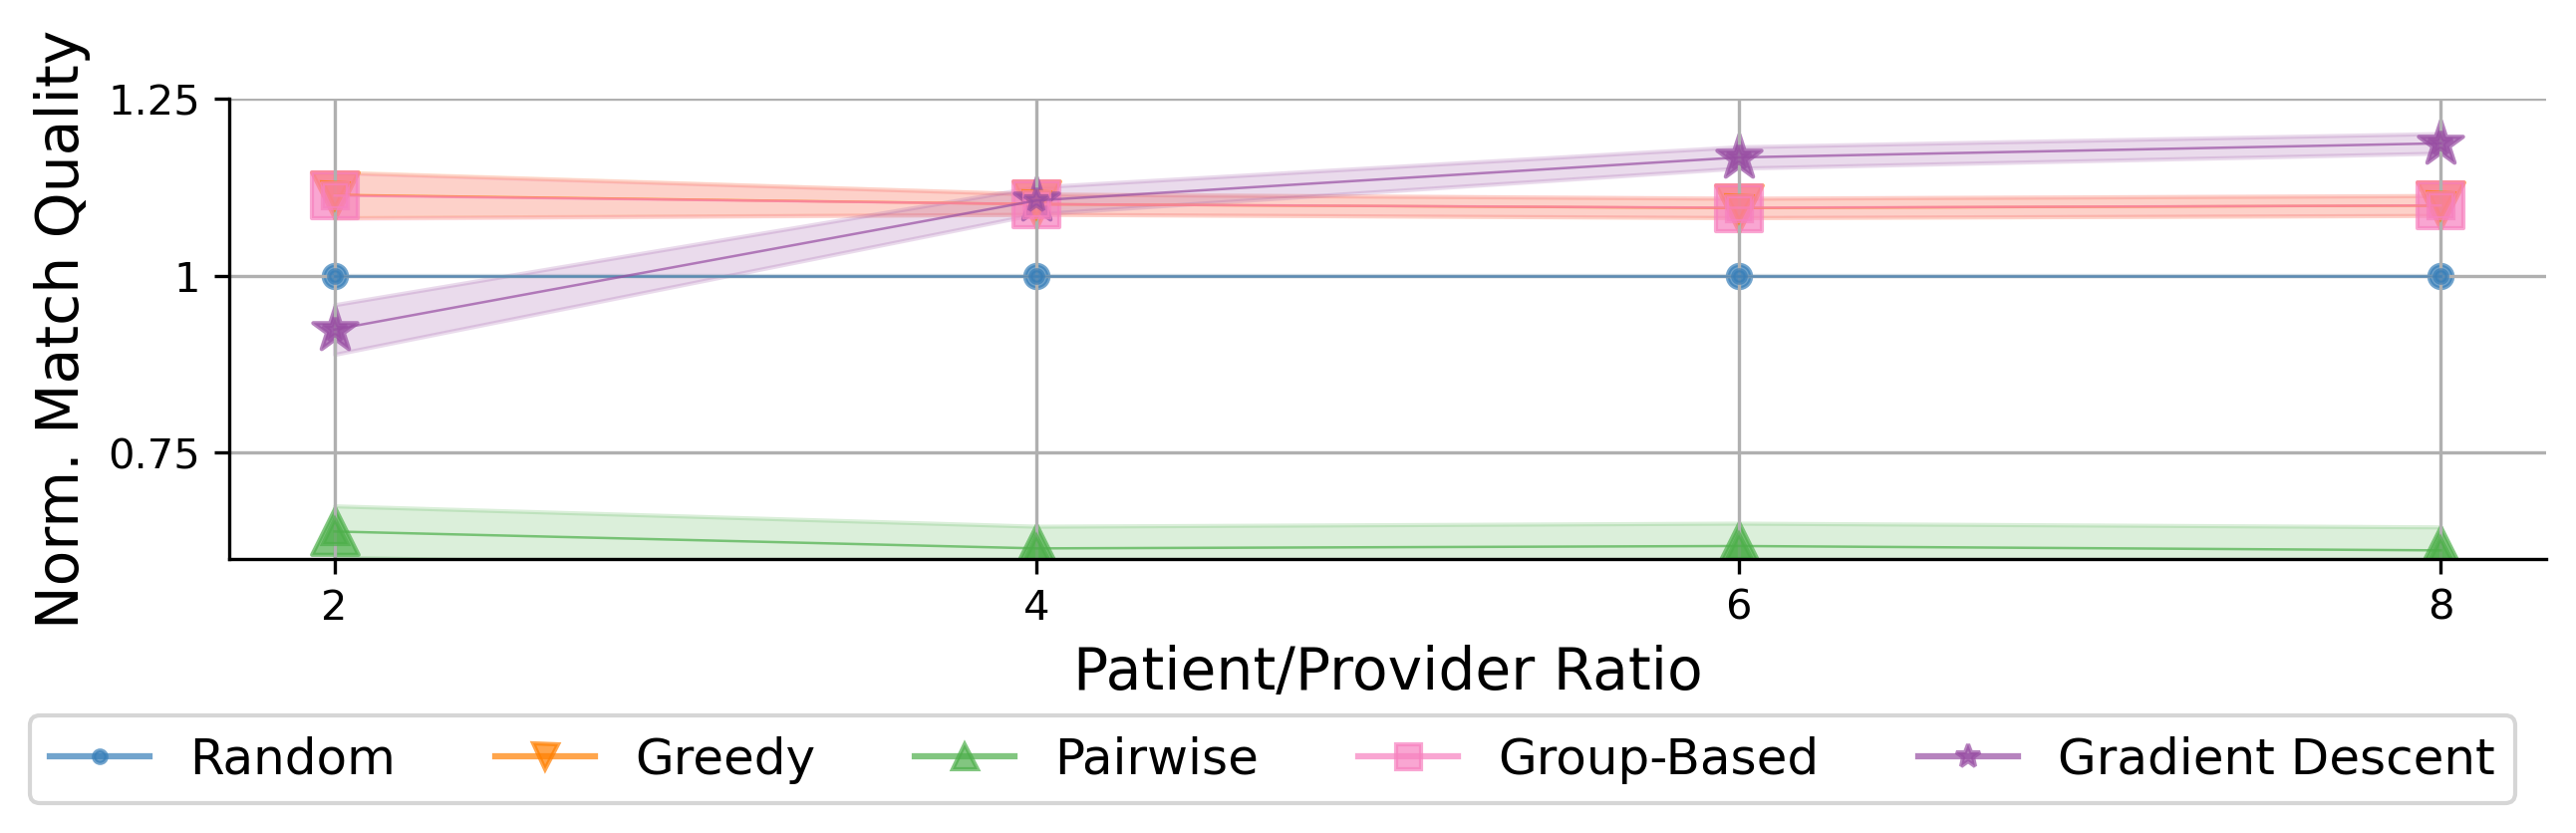

In [264]:
plot_dimensions = (1,1)
x_labels = [["Patient/Provider Ratio"]]
y_labels = [["Norm. Match Quality"]]
overall_format = {'figsize':(10,2),
    'style_size': style_size,
    'x_ticks': [[[x_values,x_values]]],
    'y_ticks': [[[[0.75,1,1.25],[0.75,1,1.25]]]],
    'y_lim': [[[0.6,1.25]]],
    'has_grid': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels,y_labels=y_labels)

line_format = {'color_palette': 'six_color', 'size': 125}
plot_line(ax[0][0],[x_values for i in range(len(ratio_y_values))],ratio_y_values,ratio_confidences,method_labels,line_format)
plot_scatter(ax[0][0],[x_values for i in range(len(ratio_y_values))],ratio_y_values,[None for i in range(len(method_labels))],line_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'lower left', 'ncol': 5, 'bbox_to_anchor': (0.05,-0.34), 'show_point': True}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("../../results/figures/vary_providers_patients.pdf",dpi=300, bbox_inches='tight')

### Other Choice Models

In [259]:
exit_options = [0.1,0.25,0.5,0.75]
choice_models = ['mnl','threshold']
dataset = "misspecification"

y_value_matrix = [[[0 for i in range(5)] for i in range(4)] for i in range(2)]
y_confidence_matrix = [[[0 for i in range(5)] for i in range(4)] for i in range(2)]

baseline_params = {'num_patients': 25, 'num_providers': 25,'top_choice_prob': 0.5, 'true_top_choice_prob': 0.5, 'fairness_weight': 0}
for i in range(len(y_value_matrix)):
    for j in range(len(y_value_matrix[i])):
        baseline_params['choice_model'] = choice_models[i]
        baseline_params['exit_option'] = exit_options[j]

        results = get_results_matching_parameters(dataset,"",baseline_params)
        aggregate_data = aggregate_normalize_data(results,baseline="random")

        y_value_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][0] for method in methods]
        y_confidence_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][1]/((len(results))**.5) for method in methods]

In [260]:
np.min(y_value_matrix[0][0][2:])/y_value_matrix[0][0][1]

1.217504365782899

In [261]:
np.min(y_value_matrix[0][-1][2:])/y_value_matrix[0][-1][1]

1.0043694902636433

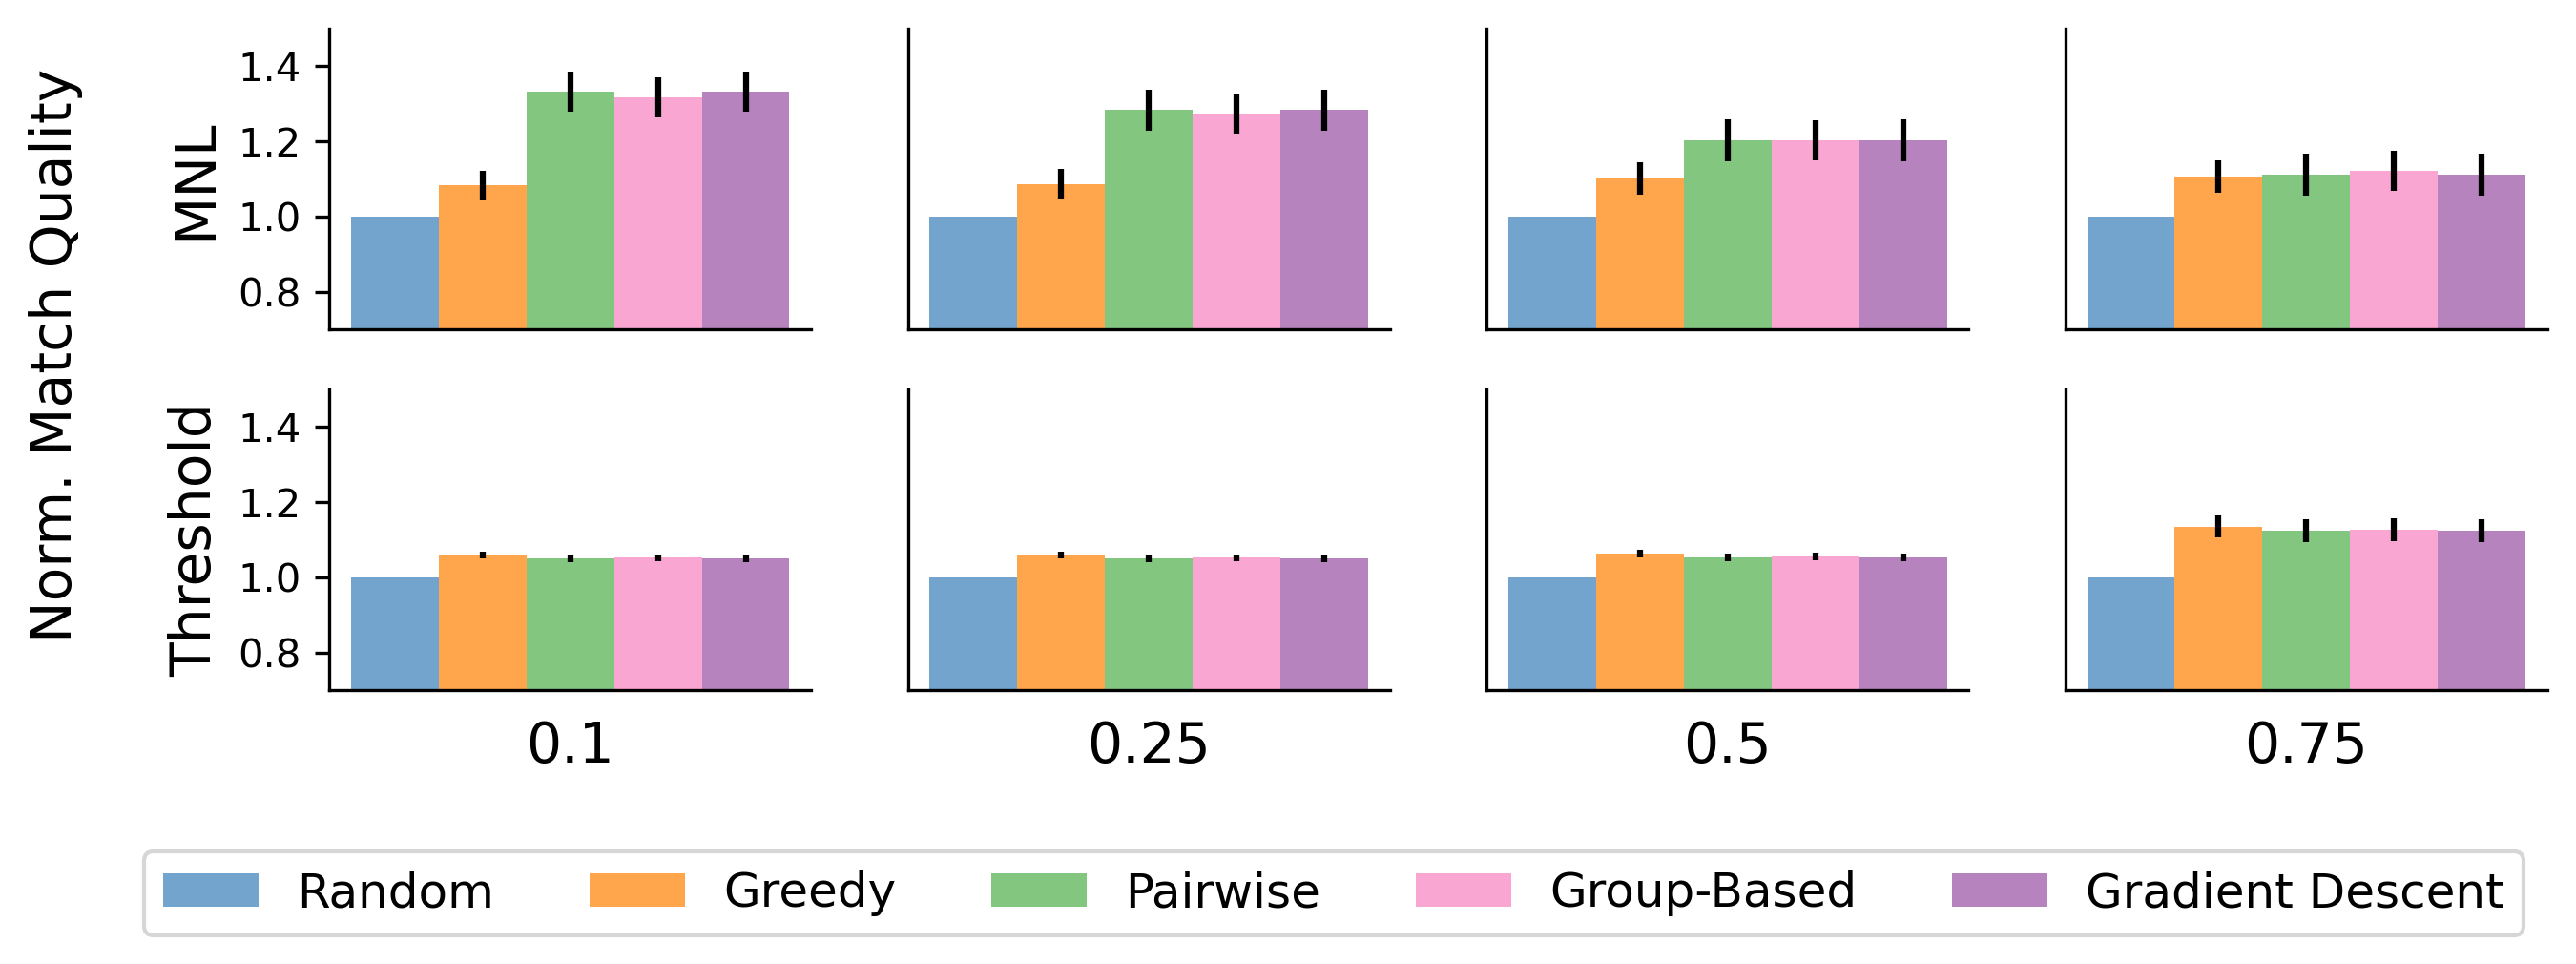

In [263]:
plot_dimensions = (2,4)
x_labels = [["","","",""],["0.1","0.25","0.5","0.75","0.9"]]
y_labels = [["MNL","","",""],["Threshold","","","",""]]
sup_y_label = "Norm. Match Quality"

overall_format = {'figsize':(10, 3),
    'style_size': style_size,
    'x_ticks': [[[[],[]] for i in range(5)] for i in range(2)],
    'y_lim': [[[0.7,1.5] for i in range(5)] for j in range(2)], 
    'y_ticks': [[[[],[]] if i != 0 else [[0.8,1,1.2,1.4],[0.8,1.0,1.2,1.4]] for i in range(5)] for i in range(2)],

}
fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,x_labels=x_labels,sup_y_label=sup_y_label)

bar_format = {'style_size': style_size,
    'color_palette': 'six_color'}

for i in range(2):
    for j in range(4):
        x_groups = [0,1,2,3,4]
        y_values = y_value_matrix[i][j]
        y_errors = y_confidence_matrix[i][j]
        labels = method_labels
        plot_bar(ax[i][j],x_groups,y_values,y_errors,labels,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper right', 'ncol': 5, 'bbox_to_anchor': (0.9,-0.05)}
create_legend(fig,ax,plot_dimensions,legend_format)
fig.savefig("../../results/figures/other_choice_models.pdf",dpi=300, bbox_inches='tight')

In [271]:
choice_prob = [0.25,0.5,0.75][::-1]
shift = [-0.25,-0.1,0,0.1,0.25]
dataset = "misspecification"

y_value_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(3)]
y_confidence_matrix = [[[0 for i in range(5)] for i in range(5)] for i in range(3)]

baseline_params = {'num_patients': 25, 'num_providers': 25,'top_choice_prob': 0.5, 'true_top_choice_prob': 0.5, 'fairness_weight': 0, 'choice_model': 'uniform_choice'}
for i in range(len(y_value_matrix)):
    for j in range(len(y_value_matrix[i])):
        baseline_params['top_choice_prob'] = choice_prob[i]
        baseline_params['true_top_choice_prob'] = shift[j]+choice_prob[i]

        results = get_results_matching_parameters(dataset,"",baseline_params)
        aggregate_data = aggregate_normalize_data(results,baseline="random")

        y_value_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][0] for method in methods]
        y_confidence_matrix[i][j] = [aggregate_data['{}_utilities'.format(method)][1]/((len(results))**.5) for method in methods]

/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


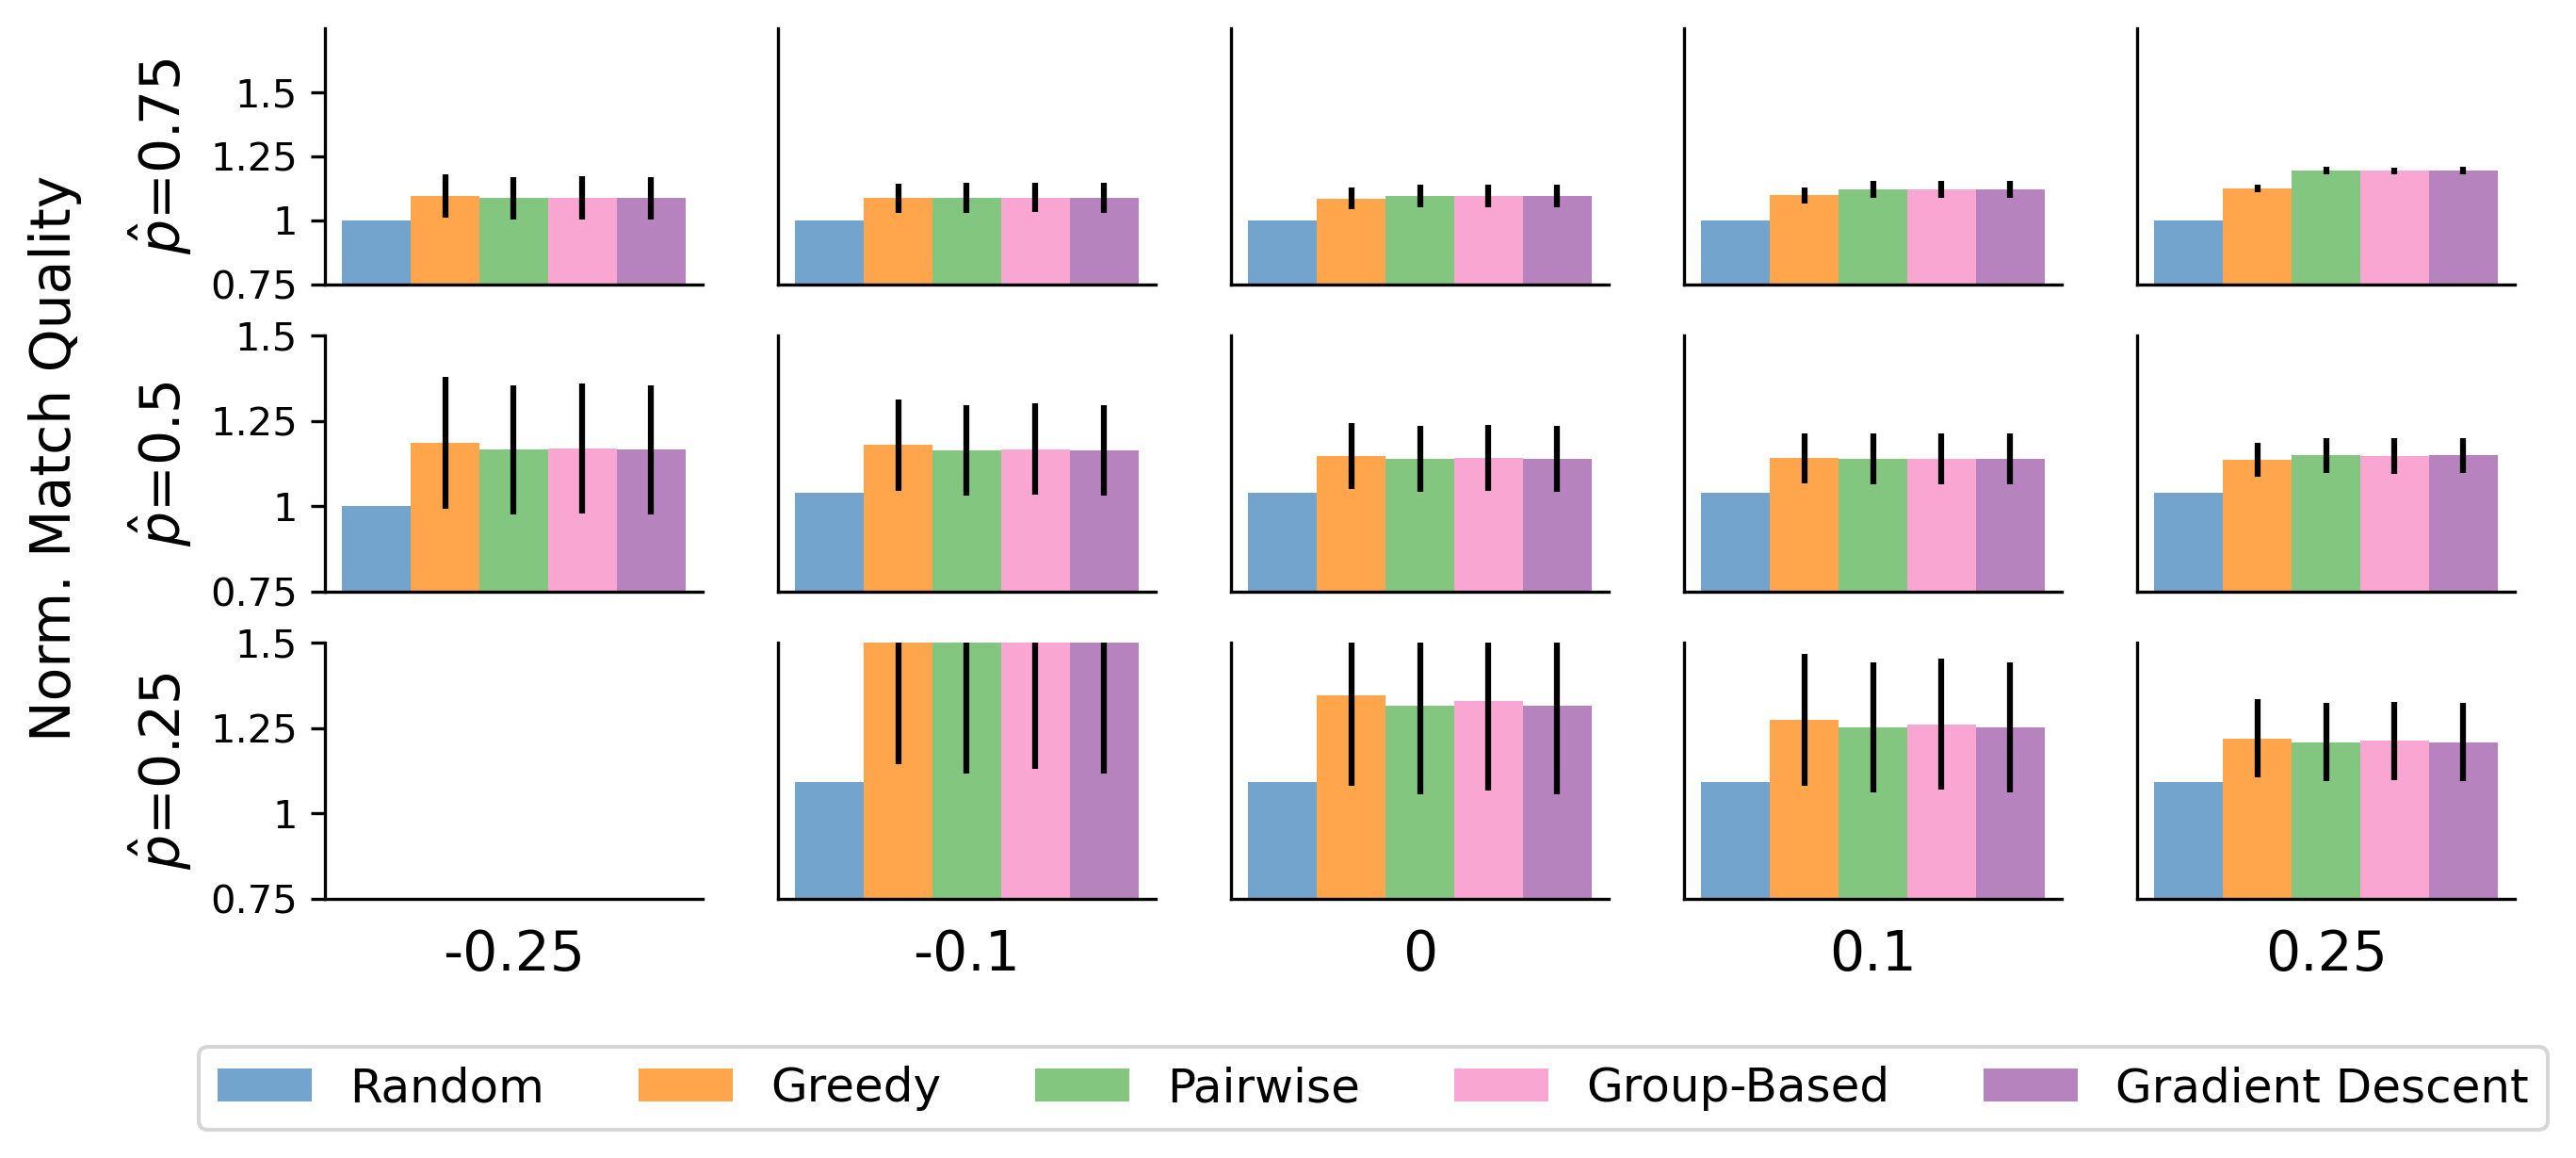

In [273]:
plot_dimensions = (3,5)
x_labels = [["","","","",""],["","","","",""],["-0.25","-0.1","0","0.1","0.25"]]
y_labels = [["$\hat{p}$=0.75","","","",""],["$\hat{p}$=0.5","","","",""],["$\hat{p}$=0.25","","","",""]]
sup_y_label = "Norm. Match Quality"

y_lim = [[0.75,1.75],[0.75,1.4],[0.75,1.3]]

overall_format = {'figsize':(10, 4),
    'style_size': style_size,
    'x_ticks': [[[[],[]] for i in range(5)] for i in range(3)],
    'y_lim': [[y_lim[j] for i in range(5)] for j in range(3)], 
    'y_ticks': [[[[],[]] if i != 0 else [[0.75,1,1.25,1.5],[0.75,1,1.25,1.5]] for i in range(5)] for i in range(3)],

}
fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,x_labels=x_labels,sup_y_label=sup_y_label)

bar_format = {'style_size': style_size,
    'color_palette': 'six_color'}

for i in range(3):
    for j in range(5):
        x_groups = [0,1,2,3,4]
        y_values = y_value_matrix[i][j]
        y_errors = y_confidence_matrix[i][j]
        labels = method_labels
        plot_bar(ax[i][j],x_groups,y_values,y_errors,labels,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper right', 'ncol': 5, 'bbox_to_anchor': (0.92,0)}
create_legend(fig,ax,plot_dimensions,legend_format)
fig.savefig("../../results/figures/misspecification.pdf",dpi=300, bbox_inches='tight')

## Semi-Synthetic

In [274]:
dataset = "semi_synthetic"

y_value_matrix = [0 for i in range(5)]
y_confidence_matrix = [0 for i in range(5)] 

baseline_params = {'num_patients': 1225, 'num_providers': 700, 'max_menu_size': 2000, 'batch_size': 1,'utility_function': 'semi_synthetic_comorbidity'}
results = get_results_matching_parameters(dataset,"",baseline_params)
results = [i for i in results if i['parameters']['seed']]
print(len(results))
aggregate_data = aggregate_normalize_data(results,baseline="random")
y_value_matrix = [aggregate_data['{}_utilities'.format(method)][0] for method in methods]
y_confidence_matrix = [aggregate_data['{}_utilities'.format(method)][1]/((len(results))**.5) for method in methods]

15


/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


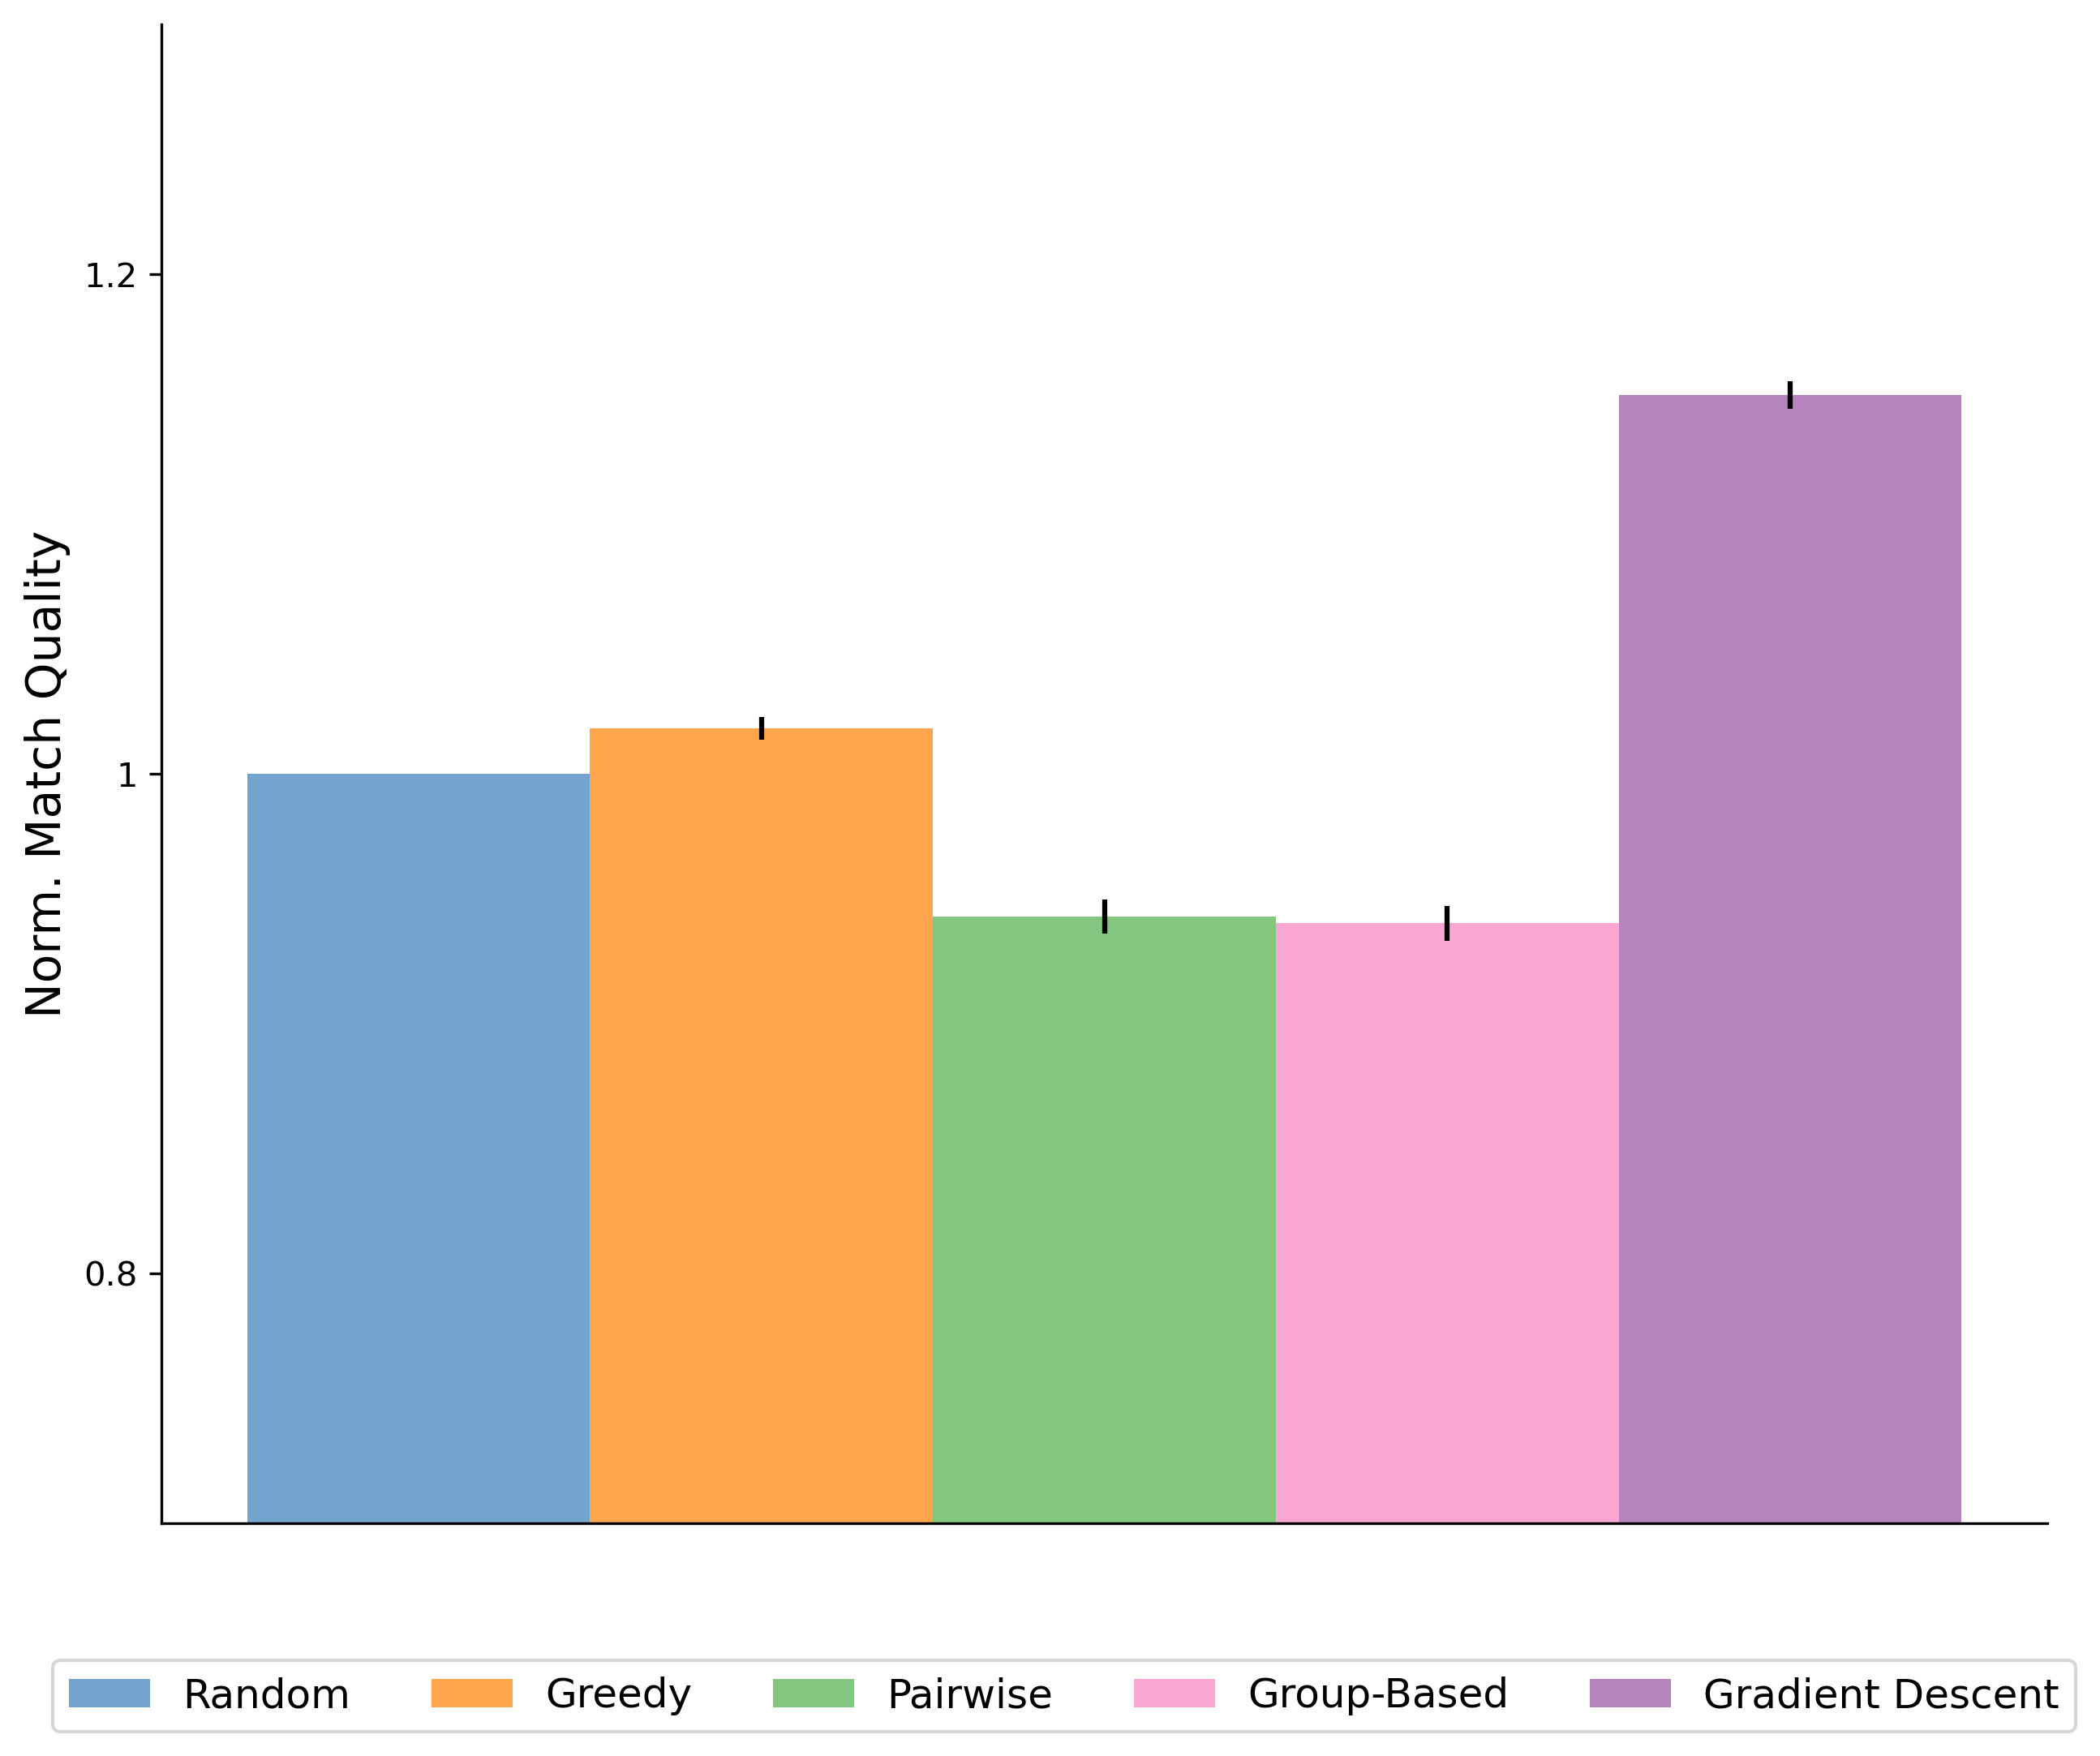

In [276]:
plot_dimensions = (1,1)
x_labels = [[""]]
y_labels = [["Norm. Match Quality"]]

overall_format = {'figsize':(10, 8),
    'style_size': style_size,
    'x_ticks': [[[[],[]]]],
    'y_lim': [[[0.7,1.3]]], 
    'y_ticks': [[[[0.8,1,1.2],[0.8,1,1.2]]]],
}
fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,x_labels=x_labels)

bar_format = {'style_size': style_size,
    'color_palette': 'six_color'}

x_groups = [0,1,2,3,4]
y_values = y_value_matrix
y_errors = y_confidence_matrix
labels = method_labels
plot_bar(ax[0][0],x_groups,y_values,y_errors,labels,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper right', 'ncol': 5, 'bbox_to_anchor': (0.92,0.05)}
create_legend(fig,ax,plot_dimensions,legend_format)
fig.savefig("../../results/figures/policy_comparison_semi_synthetic.pdf",dpi=300, bbox_inches='tight')

In [277]:
dataset="semi_synthetic"
baseline_params = {'utility_function': 'semi_synthetic_comorbidity', 'num_patients': 1225, 'batch_size': 1, 'max_menu_size': 2000}
matches_by_zipcode = {}
match_quality_by_zipcode = {}
for seed in range(43,58):
    baseline_params['seed'] = seed
    results = get_results_matching_parameters(dataset,"",baseline_params)
    match_rates_per = np.array(results[0]['gradient_descent_fast_matches_per'])
    match_times = np.sum(match_rates_per[0],axis=1)
    patient_data = json.load(open("../../data/patient_data_{}_1225_700_comorbidity.json".format(seed)))
    theta_data = json.load(open("../../data/patient_data_{}_1225_700_comorbidity.json".format(seed)))

    for i in range(len(match_times)):
        zip_val = patient_data[i]['location']
        if zip_val not in matches_by_zipcode:
            matches_by_zipcode[zip_val] = []
        matches_by_zipcode[zip_val].append(match_times[i])

    theta_data = np.array(json.load(open("../../data/{}_1225_700_comorbidity.json".format(seed)))[0])
    theta_data[(theta_data<0.75) & (theta_data>=0.5)] = theta_data[(theta_data<0.75) & (theta_data>=0.5)]+0.25
    theta_data[theta_data>=0.75] = 2*(theta_data[theta_data>=0.75]-0.75)+0.5
    theta_data[theta_data>0] = 10.1/theta_data[theta_data>0]    
    avg_match_quality = np.sum(theta_data*match_rates_per[0],axis=1)
    avg_match_quality[match_times>0] /= match_times[match_times>0]
    for i in range(len(match_times)):
        zip_val = patient_data[i]['location']
        if zip_val not in match_quality_by_zipcode:
            match_quality_by_zipcode[zip_val] = []
        match_quality_by_zipcode[zip_val].append(avg_match_quality[i])

for i in matches_by_zipcode:
    matches_by_zipcode[i] = np.mean(matches_by_zipcode[i])
    match_quality_by_zipcode[i] = np.mean(match_quality_by_zipcode[i])

/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("coolwarm").copy()
  
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("coolwarm").copy()
  from ipykernel import kernelapp as app


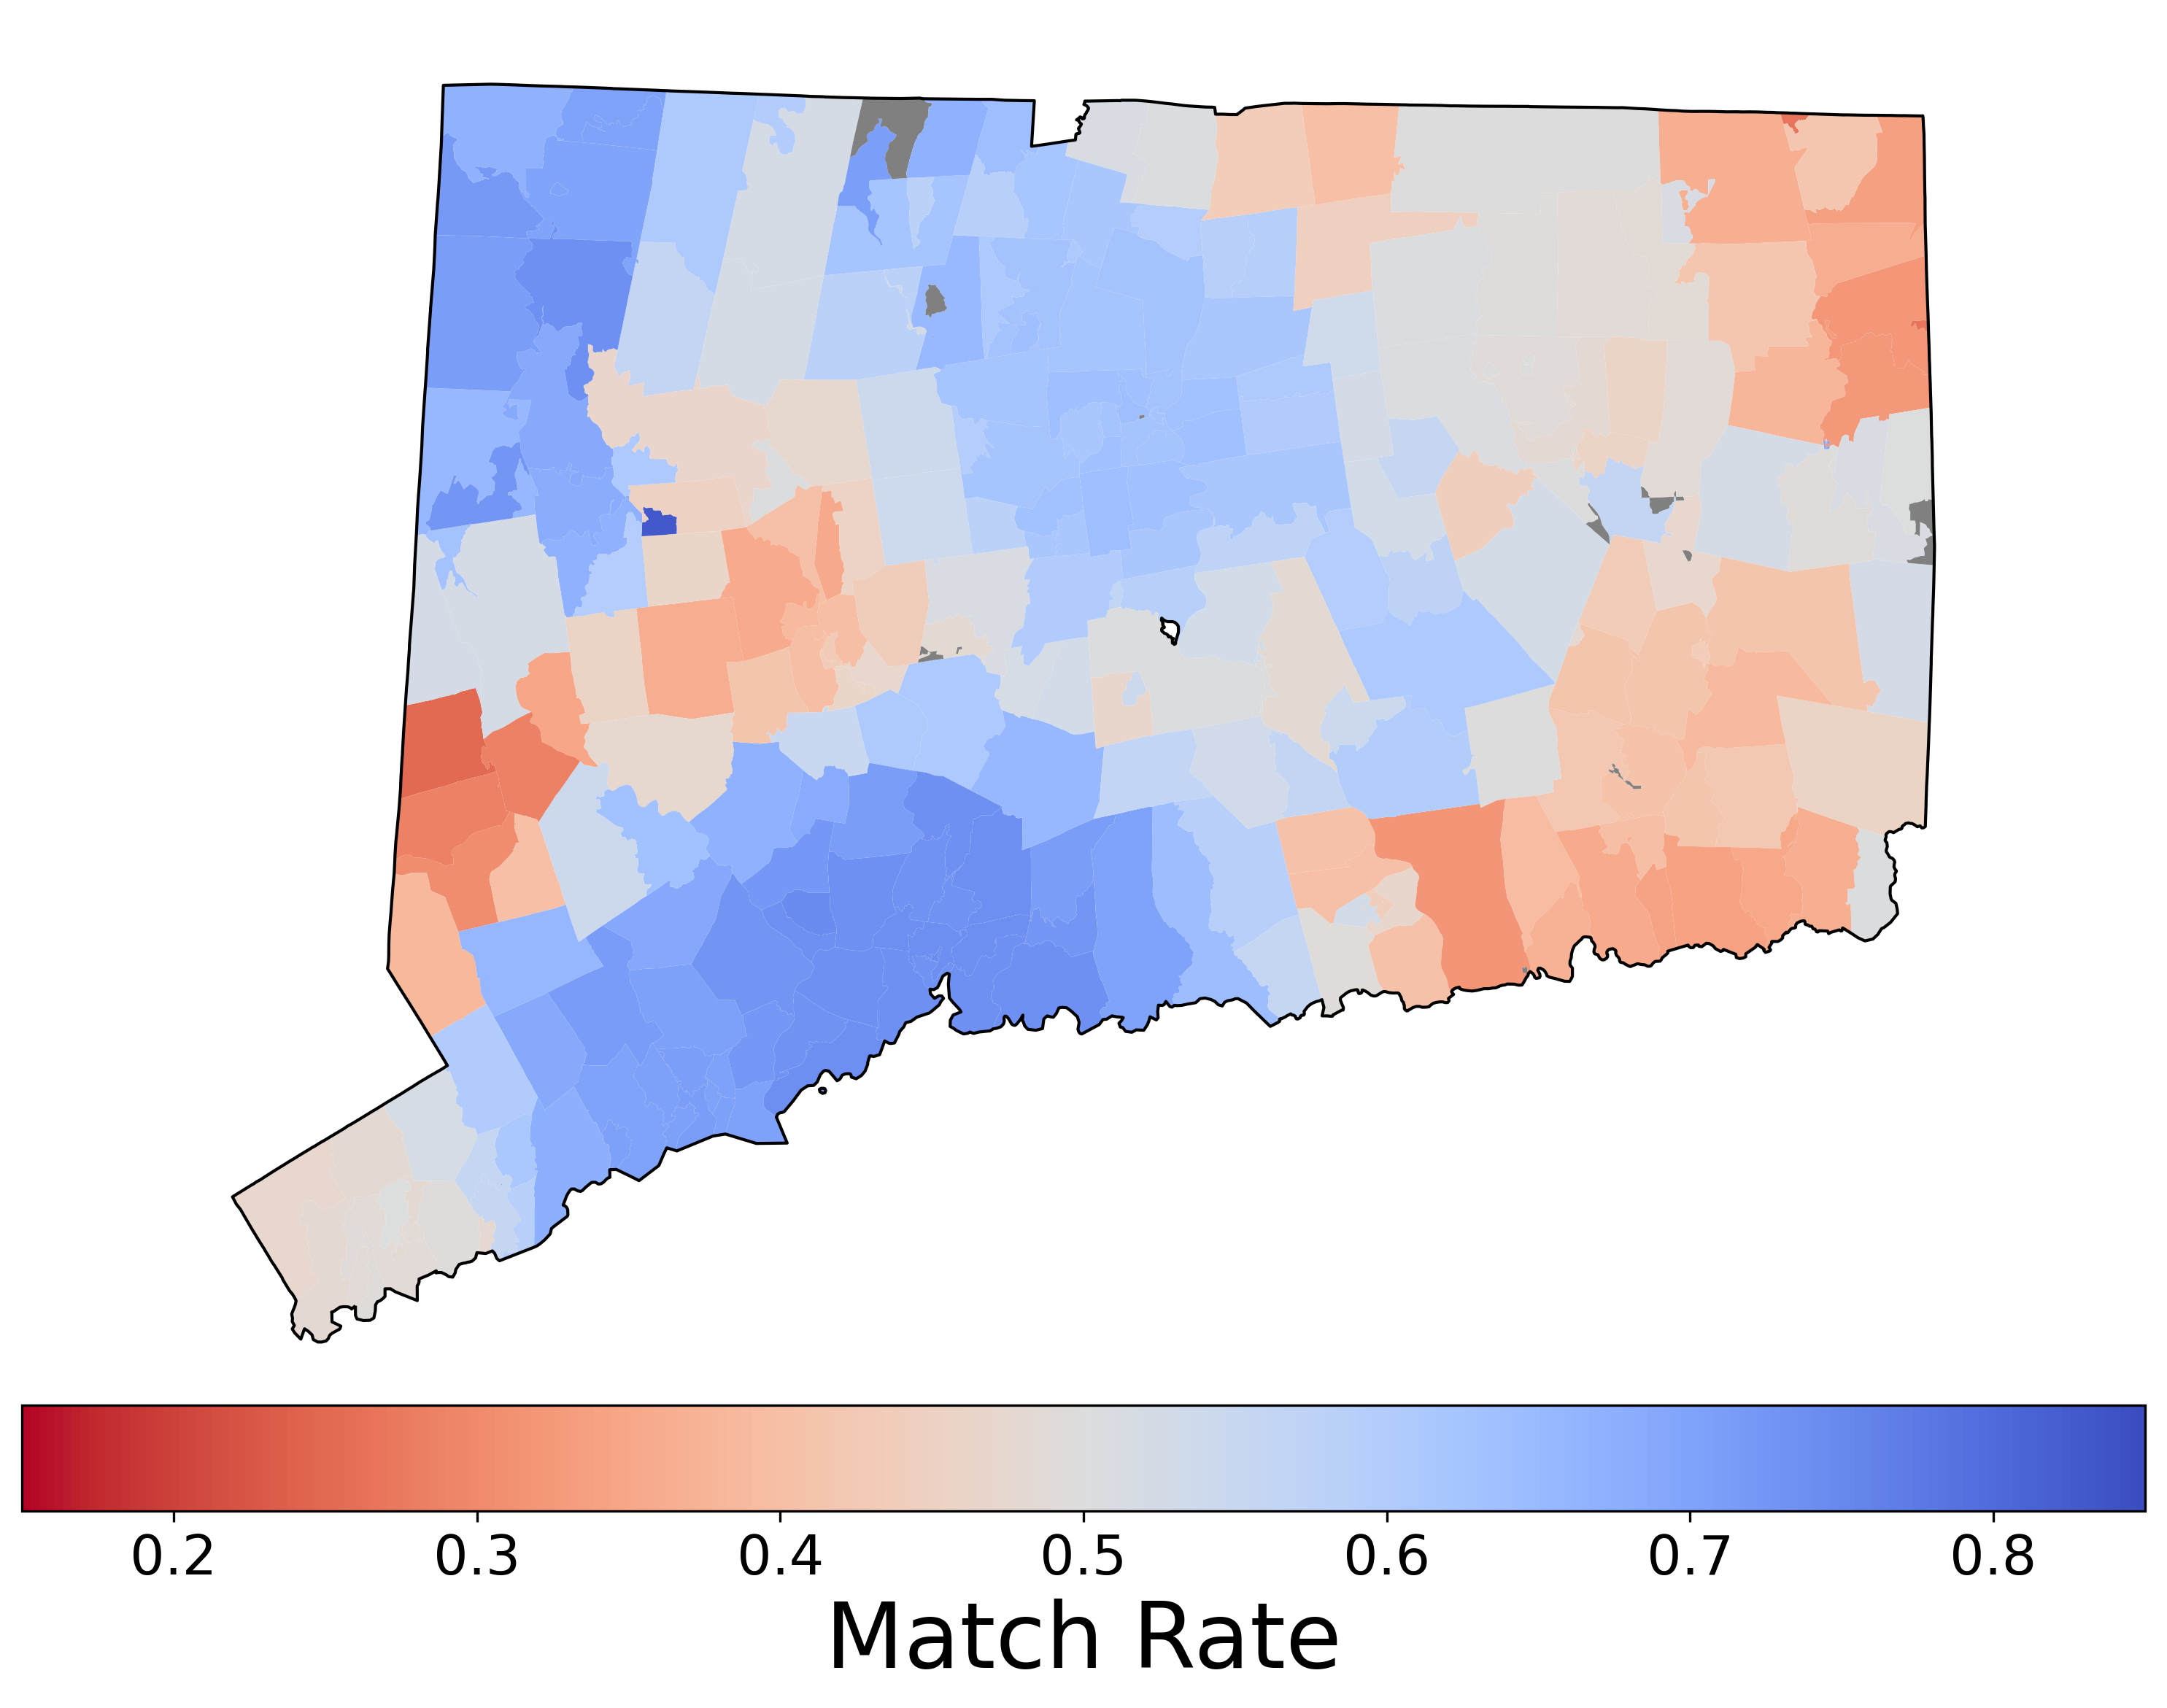

In [278]:
ct_zipcodes = gpd.read_file("../../data/ct.geojson")

# Generate random data for each ZIP code
ct_zipcodes["match_rate"] = [matches_by_zipcode[i] if i in matches_by_zipcode else -1 for i in ct_zipcodes["ZCTA5CE10"]]
ct_zipcodes["match_quality"] = [match_quality_by_zipcode[i] if i in match_quality_by_zipcode else -1 for i in ct_zipcodes["ZCTA5CE10"]]


cmap = mcolors.ListedColormap(["grey"] + plt.cm.coolwarm(np.linspace(0, 1, 256)).tolist())
norm = mcolors.BoundaryNorm(boundaries=[-1, 0, 1], ncolors=cmap.N, extend="both")

# Plotting the heatmap
fig, ax = plt.subplots(1,1,figsize=(10, 8))
cmap = plt.cm.coolwarm
cmap.set_under("grey")  # Values below the range (e.g., -1) will be grey
cmap.set_over("grey")   # Optionally, shade values above the range if needed

# Normalize the color range between 0 and 1
norm = mcolors.Normalize(vmin=0.15, vmax=0.85, clip=False)

colorbar = ct_zipcodes.plot(
    column="match_rate",
    cmap=cmap.reversed(),
    norm=norm,
    legend=True,
    legend_kwds={
        'label': "Match Rate",
        'orientation': "horizontal",
        'shrink': 1,
        'pad': 0,
    },
    ax=ax
)
cbar = ax.get_figure().axes[-1]  # Access the colorbar axis
cbar.set_xlabel("Match Rate", fontsize=30)  # Increase font size for the label




ct_outline = ct_zipcodes.dissolve()
ct_outline.boundary.plot(ax=ax, color="black", linewidth=1)

# Enhance the plot
ax.axis("off")
# Show the plot
plt.tight_layout()
fig.savefig("../../results/figures/ct_match_rate.pdf",dpi=300, bbox_inches='tight')

In [279]:
def get_dist(theta_val):
    if theta_val < 0.5:
        return 0
    elif theta_val <= 0.75:
        return 10.1/(2*(theta_val-0.5) + 0.5)
    else:
        return 10.1/(2*(theta_val-0.75)+0.5)

In [280]:
theta_data = np.array(json.load(open("../../data/{}_1225_700_comorbidity.json".format(seed)))[0])

In [281]:
np.sum(theta_data*match_rates_per[0])/1225

0.407257579831468

In [156]:
dataset="semi_synthetic"
baseline_params = {'utility_function': 'semi_synthetic_comorbidity', 'num_patients': 1225, 'batch_size': 1, 'max_menu_size': 2000}
matches_by_comorbidity = {0: [], 1: []} 
distance_by_comorbidity = {0: [], 1: []}
qual_by_comorbidity = {0: [], 1: []}
percent_providers_matched_specialist = []
for seed in range(43,58):
    baseline_params['seed'] = seed
    results = get_results_matching_parameters(dataset,"",baseline_params)
    print(len(results))

    match_rates_per = np.array(results[0]['gradient_descent_fast_matches_per'])
    match_times = np.sum(match_rates_per[0],axis=1)
    patient_data = json.load(open("../../data/patient_data_{}_1225_700_comorbidity.json".format(seed)))
    theta_data = json.load(open("../../data/patient_data_{}_1225_700_comorbidity.json".format(seed)))

    comorbidity_by_patient = []
    temp_matches_by_comorbidity = {0: [], 1: []}
    for i in range(len(match_times)):
        has_comorbidity = 1 in [patient_data[i][c] for c in ['cardio','gastro','neuro','substance','onco']]
        comorbidity_by_patient.append(int(has_comorbidity))
        temp_matches_by_comorbidity[int(has_comorbidity)].append(match_times[i])
    for i in range(2):
        matches_by_comorbidity[i].append(np.mean(temp_matches_by_comorbidity[i]))

    theta_data = np.array(json.load(open("../../data/{}_1225_700_comorbidity.json".format(seed)))[0])

    get_dist_vectorized = np.vectorize(get_dist)
    distance_data = get_dist_vectorized(theta_data)


    avg_dist_by_user = np.sum(distance_data*match_rates_per[0],axis=1)
    avg_dist_by_user[match_times>0]/= match_times[match_times>0]
    temp_distance_by_comorbidity = {0: [], 1: []}
    for i in range(len(match_times)):
        if avg_dist_by_user[i]>0:
            temp_distance_by_comorbidity[comorbidity_by_patient[i]].append(avg_dist_by_user[i])
    for i in range(2):
        distance_by_comorbidity[i].append(np.mean(temp_distance_by_comorbidity[i]))

    avg_qual_by_user = np.sum(theta_data*match_rates_per[0],axis=1)
    avg_qual_by_user[match_times>0]/= match_times[match_times>0]
    temp_qual_by_comorbidity = {0: [], 1: []}
    for i in range(len(match_times)):
        if avg_dist_by_user[i]>0:
            temp_qual_by_comorbidity[comorbidity_by_patient[i]].append(avg_qual_by_user[i])
    for i in range(2):
        qual_by_comorbidity[i].append(np.mean(temp_qual_by_comorbidity[i]))

    specialty_grouping = {
        'cardio': ['CARDIOVASCULAR DISEASE (CARDIOLOGY)','ADVANCED HEART FAILURE AND TRANSPLANT CARDIOLOGY','INTERVENTIONAL CARDIOLOGY','CARDIAC ELECTROPHYSIOLOGY','PERIPHERAL VASCULAR DISEASE','CRITICAL CARE (INTENSIVISTS)'], 
        'gastro': ['NEPHROLOGY','ENDOCRINOLOGY'],
        'neuro': ['CRITICAL CARE (INTENSIVISTS)','GERIATRIC MEDICINE','SLEEP MEDICINE'],
        'substance': ['ADDICTION MEDICINE'], 
        'onco': ['CRITICAL CARE (INTENSIVISTS)','HEMATOLOGY','MEDICAL ONCOLOGY'],
    }
    provider_data = json.load(open("../../data/provider_data_{}_1225_700_comorbidity.json".format(seed)))

    providers_with_speciality = [False for i in range(700)]
    for i in range(700):
        for spec in specialty_grouping:
            providers_with_speciality[i]  = providers_with_speciality[i] or any([s in provider_data[i]['sec_spec_all'] for s in specialty_grouping[spec]])
    
    percent_providers_matched_specialist.append(np.sum(theta_data[theta_data>0.75]*match_rates_per[0][theta_data>0.75])/np.sum(providers_with_speciality))


1


1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [165]:
np.mean(percent_providers_matched_specialist)

0.8983131365962241

In [166]:
np.mean(temp_matches_by_comorbidity[0]), np.mean(temp_matches_by_comorbidity[1])

(0.5587068965517241, 0.5645891472868217)

In [167]:
stats.ttest_ind(qual_by_comorbidity[0], qual_by_comorbidity[1])

Ttest_indResult(statistic=-19.11797287695332, pvalue=1.3196073892553799e-17)

In [168]:
np.mean(qual_by_comorbidity[1])/np.mean(qual_by_comorbidity[0])

1.075711682981143

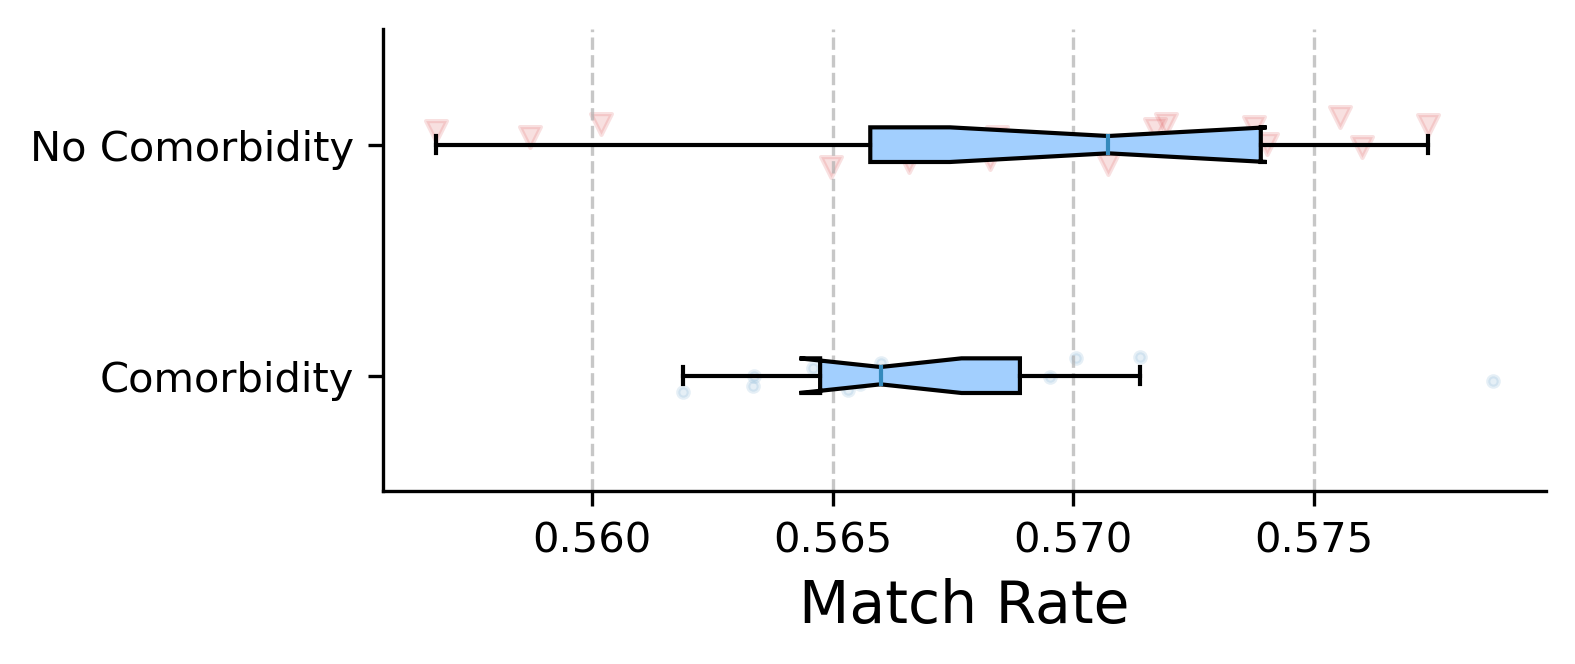

In [169]:
plot_dimensions = (1,1)
x_labels = [["Match Rate"],["Average Distance"]]
overall_format = {'figsize':(5,2),
    'style_size': style_size,
    'has_x_grid': True, 
}
fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels)

whisker_format = {'color_palette': '#a2cffe', 'style_size': style_size}
plot_box_whisker(ax[0][0],[matches_by_comorbidity[0],matches_by_comorbidity[1]][::-1],["No Comorbidity","Comorbidity"][::-1],whisker_format)

scatter_format = {'color_palette': 'two_color_blue_red_light', 'size': 25}
y_positions = [np.random.normal(i + 1, 0.05, size=len(matches_by_comorbidity[0])) for i in range(2)]
labels = []
plot_scatter(ax[0][0],[matches_by_comorbidity[0],matches_by_comorbidity[1]][::-1],y_positions,labels,scatter_format)

fig.savefig("../../results/figures/semi_synthetic_comorbidity_match.pdf",dpi=300, bbox_inches='tight')

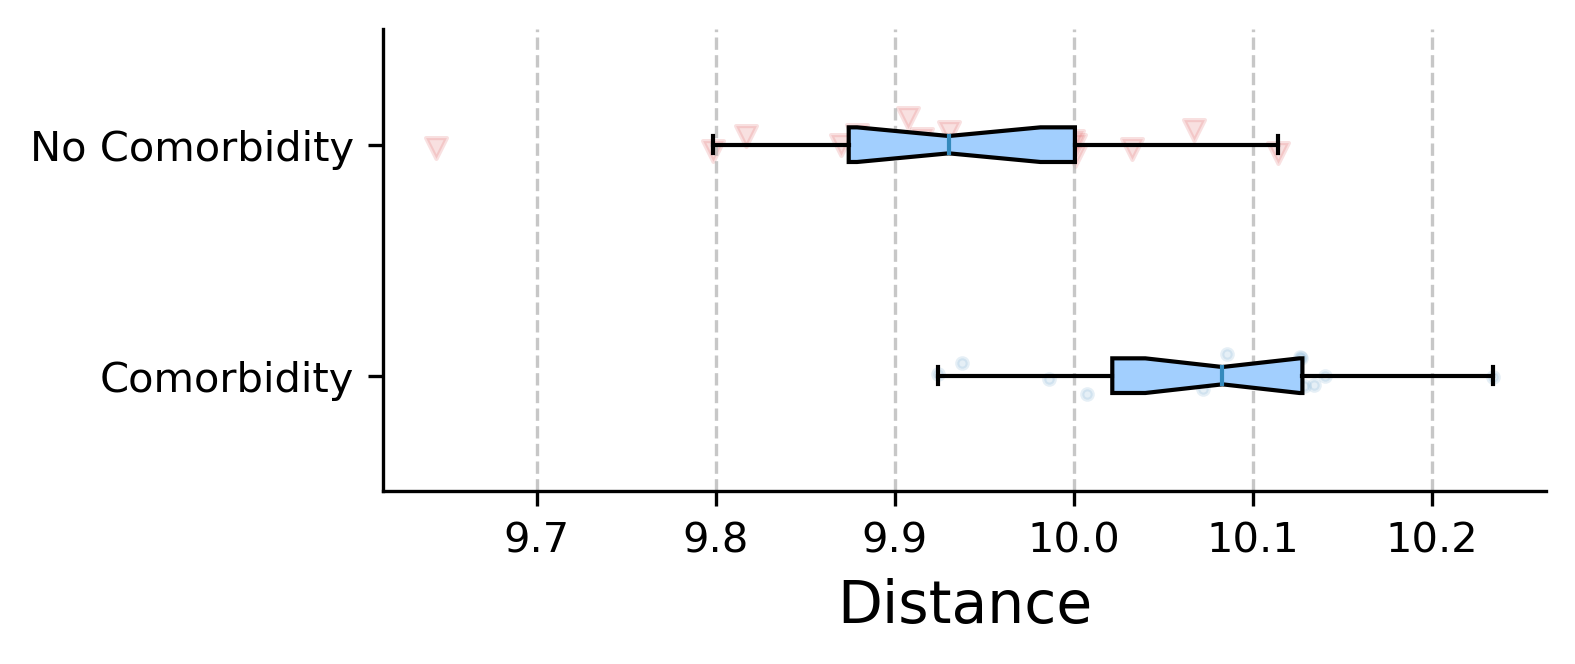

In [170]:
plot_dimensions = (1,1)
x_labels = [["Distance"]]
overall_format = {'figsize':(5,2),
    'style_size': style_size,
    'has_x_grid': True, 
}
fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels)

whisker_format = {'color_palette': '#a2cffe', 'style_size': style_size}
plot_box_whisker(ax[0][0],[distance_by_comorbidity[0],distance_by_comorbidity[1]][::-1],["No Comorbidity","Comorbidity"][::-1],whisker_format)

scatter_format = {'color_palette': 'two_color_blue_red_light', 'size': 25}
y_positions = [np.random.normal(i + 1, 0.05, size=len(distance_by_comorbidity[0])) for i in range(2)]
labels = []
plot_scatter(ax[0][0],[distance_by_comorbidity[0],distance_by_comorbidity[1]][::-1],y_positions,labels,scatter_format)
fig.savefig("../../results/figures/semi_synthetic_comorbidity_distance.pdf",dpi=300, bbox_inches='tight')

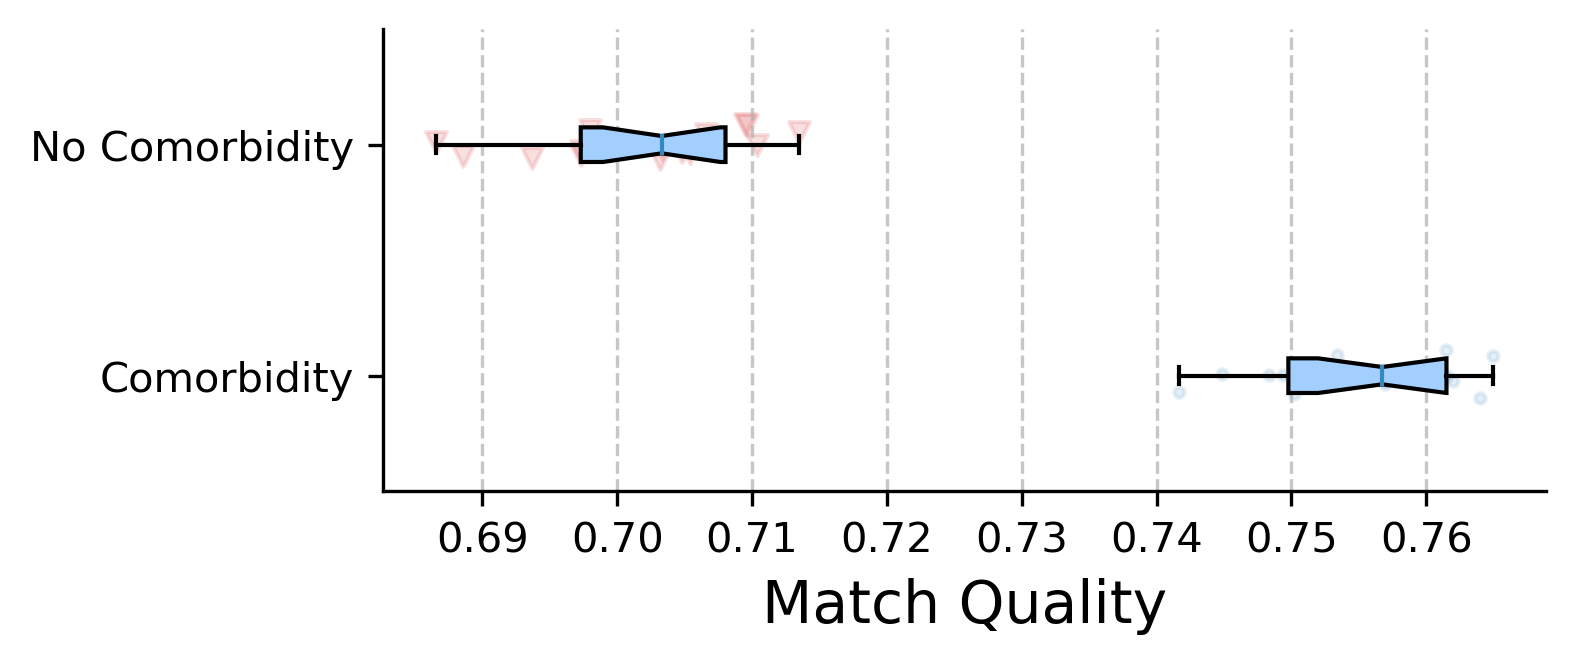

In [171]:
plot_dimensions = (1,1)
x_labels = [["Match Quality"]]
overall_format = {'figsize':(5,2),
    'style_size': style_size,
    'has_x_grid': True, 
}
fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels)

whisker_format = {'color_palette': '#a2cffe', 'style_size': style_size}
plot_box_whisker(ax[0][0],[qual_by_comorbidity[0],qual_by_comorbidity[1]][::-1],["No Comorbidity","Comorbidity"][::-1],whisker_format)

scatter_format = {'color_palette': 'two_color_blue_red_light', 'size': 25}
y_positions = [np.random.normal(i + 1, 0.05, size=len(qual_by_comorbidity[0])) for i in range(2)]
labels = []
plot_scatter(ax[0][0],[qual_by_comorbidity[0],qual_by_comorbidity[1]][::-1],y_positions,labels,scatter_format)
fig.savefig("../../results/figures/semi_synthetic_comorbidity_qual.pdf",dpi=300, bbox_inches='tight')

[0.38255120205046,
 0.384535244687963,
 0.39478750216457176,
 0.3896739573393451,
 0.38962885309138146,
 0.38406127637682697,
 0.3945648946888529,
 0.389470387516454,
 0.39414760498165347]

In [292]:
batch_y_values = []
batch_y_confidences = []
baseline_params = {'utility_function': 'semi_synthetic_comorbidity', 'max_menu_size': 2000}#, 'num_trials': 100, 'order': 'custom'}
dataset = "semi_synthetic"
x_values = [1,2,3,4,5]
for i in range(len(x_values)):
    baseline_params['batch_size'] = x_values[i]

    results = get_results_matching_parameters(dataset,"",baseline_params)
    print(len(results))
    aggregate_data = [np.mean(i['optimal_order_utilities'])/1225 for i in results]

    batch_y_values.append(np.mean(aggregate_data))
    batch_y_confidences.append(np.std(aggregate_data)/len(results)**.5)
batch_y_values = [i/batch_y_values[0] for i in batch_y_values]

15
9
9
9
9


In [293]:
y_values = [x_values[i] * np.log(205/x_values[i])/np.log(np.log(205/x_values[i])) for i in range(len(x_values))]
y_values = [i/y_values[0] for i in y_values]
y_values 

[1.0,
 1.8979248848027053,
 2.762792950967017,
 3.60954662752318,
 4.4454838656626245]

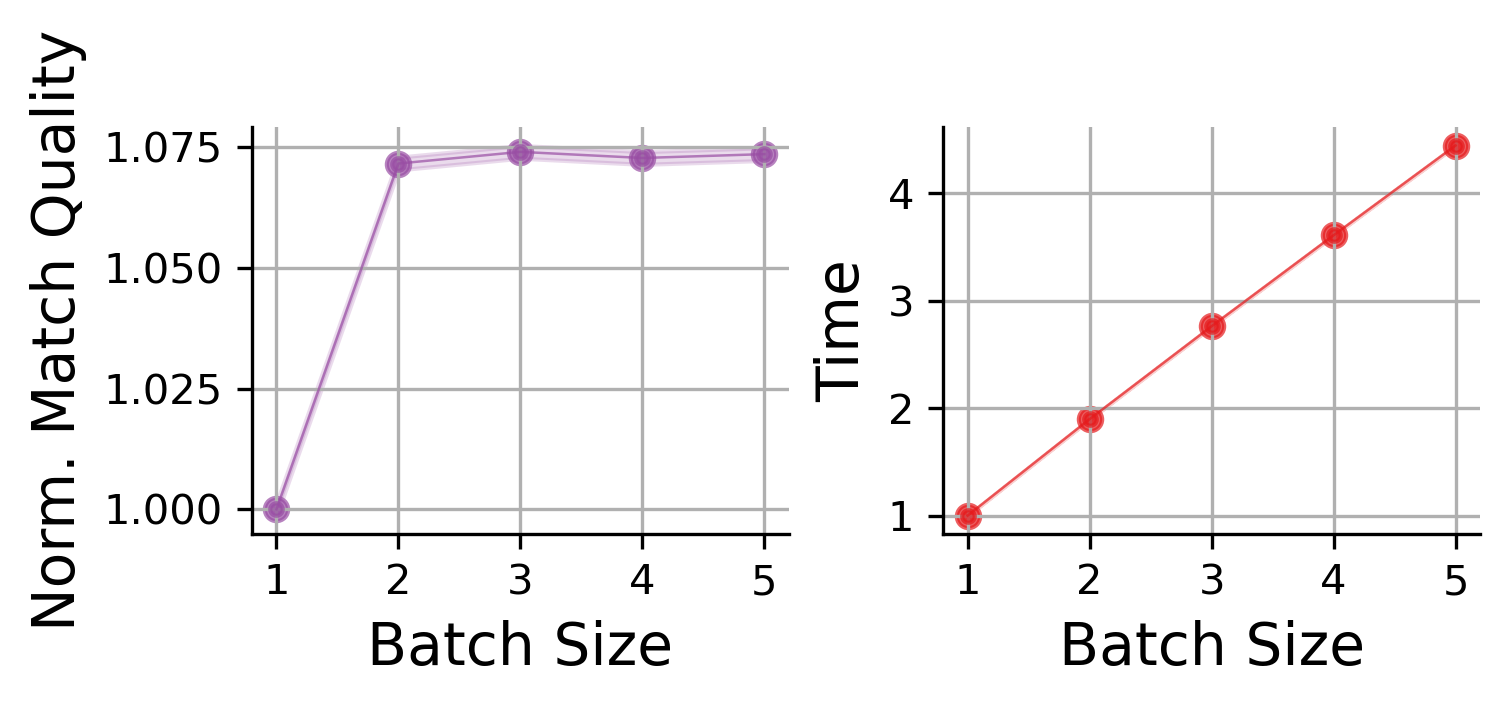

In [294]:
plot_dimensions = (1,2)
x_labels = [["Batch Size","Batch Size"]]
y_labels = [["Norm. Match Quality","Time"]]
overall_format = {'figsize':(5,2),
    'style_size': style_size,
    'x_ticks': [[[x_values,x_values],[x_values,x_values]]],
    'has_grid': True, 
    'constrained_layout': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels,y_labels=y_labels)

color = '#%02x%02x%02x%02x' % tuple(np.round(np.array(color_schemes['six_color'][-2])*256).astype(int).tolist())
line_format = {'color_palette': color, 'size': 125}
plot_line(ax[0][0],[x_values],[batch_y_values],batch_y_confidences,["Match Quality"],line_format)
plot_scatter(ax[0][0],[x_values],[batch_y_values],[None],line_format)

color = '#%02x%02x%02x%02x' % tuple(np.round(np.array(color_schemes['six_color'][-1])*256).astype(int).tolist())
line_format = {'color_palette': color, 'size': 125}
y_values = [x_values[i] * np.log(205/x_values[i])/np.log(np.log(205/x_values[i])) for i in range(len(x_values))]
y_values = [i/y_values[0] for i in y_values]
y_confidences = [0 for i in range(len(x_values))]
plot_line(ax[0][1],[x_values],[y_values],[y_confidences],["Time"],line_format)
plot_scatter(ax[0][1],[x_values],[y_values],[None],line_format)

fig.savefig("../../results/figures/batch_size.pdf",dpi=300, bbox_inches='tight')

In [296]:
menu_y_values = [[] for i in range(len(methods))]
menu_confidences = [[] for i in range(len(methods))]
baseline_params = {'utility_function': 'semi_synthetic_comorbidity', 'num_patients': 1225, 'batch_size': 1}
dataset = "semi_synthetic"
x_values = [5,10,20,40]
for i in range(len(x_values)):
    baseline_params['max_menu_size'] = x_values[i]

    results = get_results_matching_parameters(dataset,"",baseline_params)
    print(len(results))
    aggregate_data = aggregate_normalize_data(results,baseline="random")
    for method in range(len(methods)):
        menu_y_values[method].append(aggregate_data['{}_utilities'.format(methods[method])][0])
        menu_confidences[method].append(aggregate_data['{}_utilities'.format(methods[method])][1]/len(results)**.5)

9


/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr0/home/naveenr/miniconda3/envs/patient/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


6
6
6


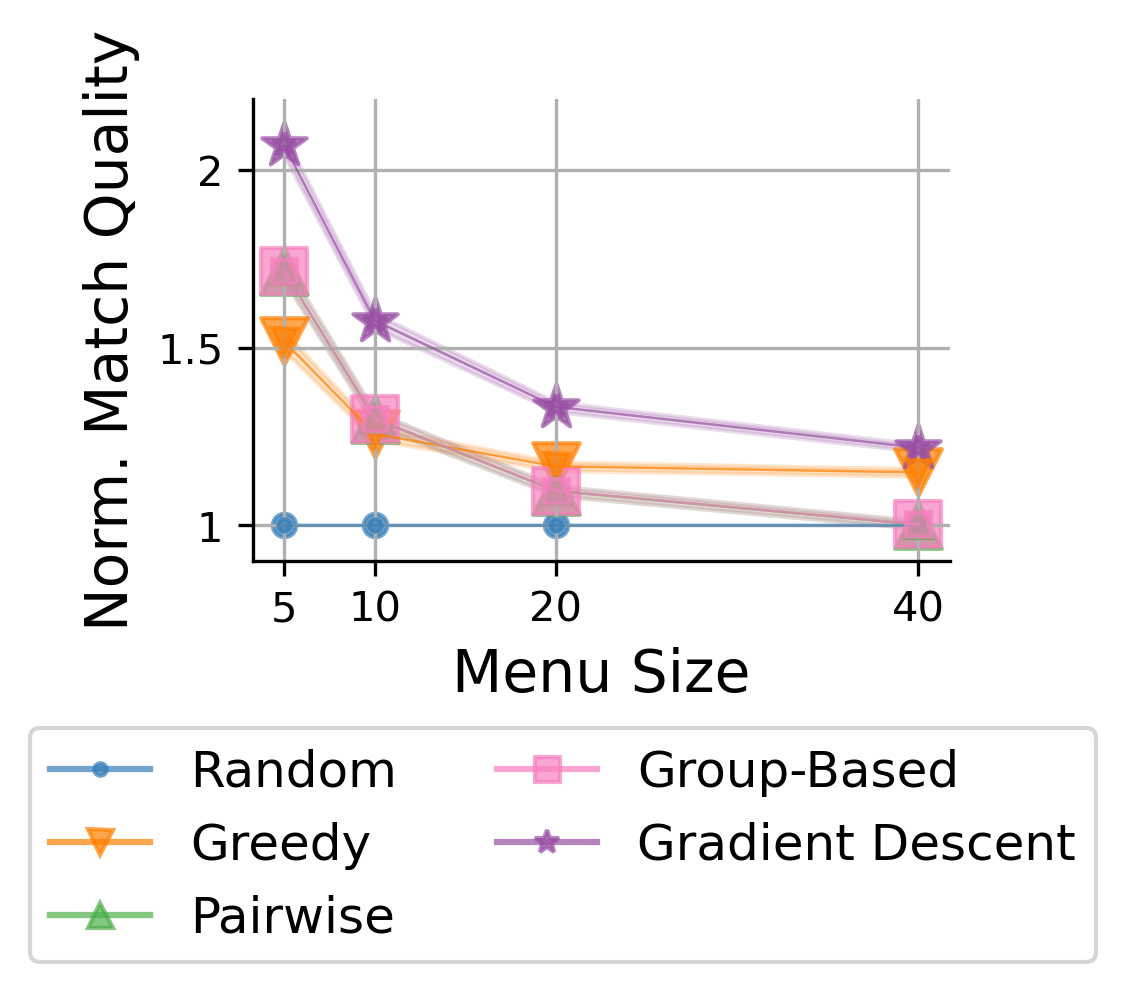

In [297]:
plot_dimensions = (1,1)
x_labels = [["Menu Size"]]
y_labels = [["Norm. Match Quality"]]
overall_format = {'figsize':(3,2),
    'style_size': style_size,
    'x_ticks': [[[x_values,x_values]]],
    'y_ticks': [[[[1,1.5,2],[1,1.5,2]]]],
    'y_lim': [[[0.9,2.2]]],
    'has_grid': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels,y_labels=y_labels)

line_format = {'color_palette': 'six_color', 'size': 125}
plot_line(ax[0][0],[x_values for i in range(len(menu_y_values))],menu_y_values,menu_confidences,method_labels,line_format)
plot_scatter(ax[0][0],[x_values for i in range(len(menu_y_values))],menu_y_values,[None for i in range(len(method_labels))],line_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'lower left', 'ncol': 2, 'bbox_to_anchor': (-0.15,-0.6), 'show_point': True}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("../../results/figures/max_menu_size.pdf",dpi=300, bbox_inches='tight')